
  PHASE 1: DATA SELECTION

ACADEMIC NOTE: Data Selection Phase
This phase implements the first step of the KDD process.
Key activities: dataset identification, loading, and initial
profiling to understand structure and characteristics.

 Dataset loaded successfully

 DATASET CHARACTERISTICS:
   Dataset Name: Social Media Viral Content and Engagement Metrics
   Total Records: 2,000 (Requirement: ≥1,000)
   Total Features: 15 (Requirement: ≥5)
   Dataset Size: 0.99 MB
   Load Time: 0.0200 seconds
   Memory Used: 0.98 MB

 FEATURE INVENTORY:
   Feature Name                          Data Type       Non-Null Count
   --------------------------------------------------------------------
    1. post_id                             object          2,000
    2. platform                            object          2,000
    3. content_type                        object          2,000
    4. topic                               object          2,000
    5. language                            object 

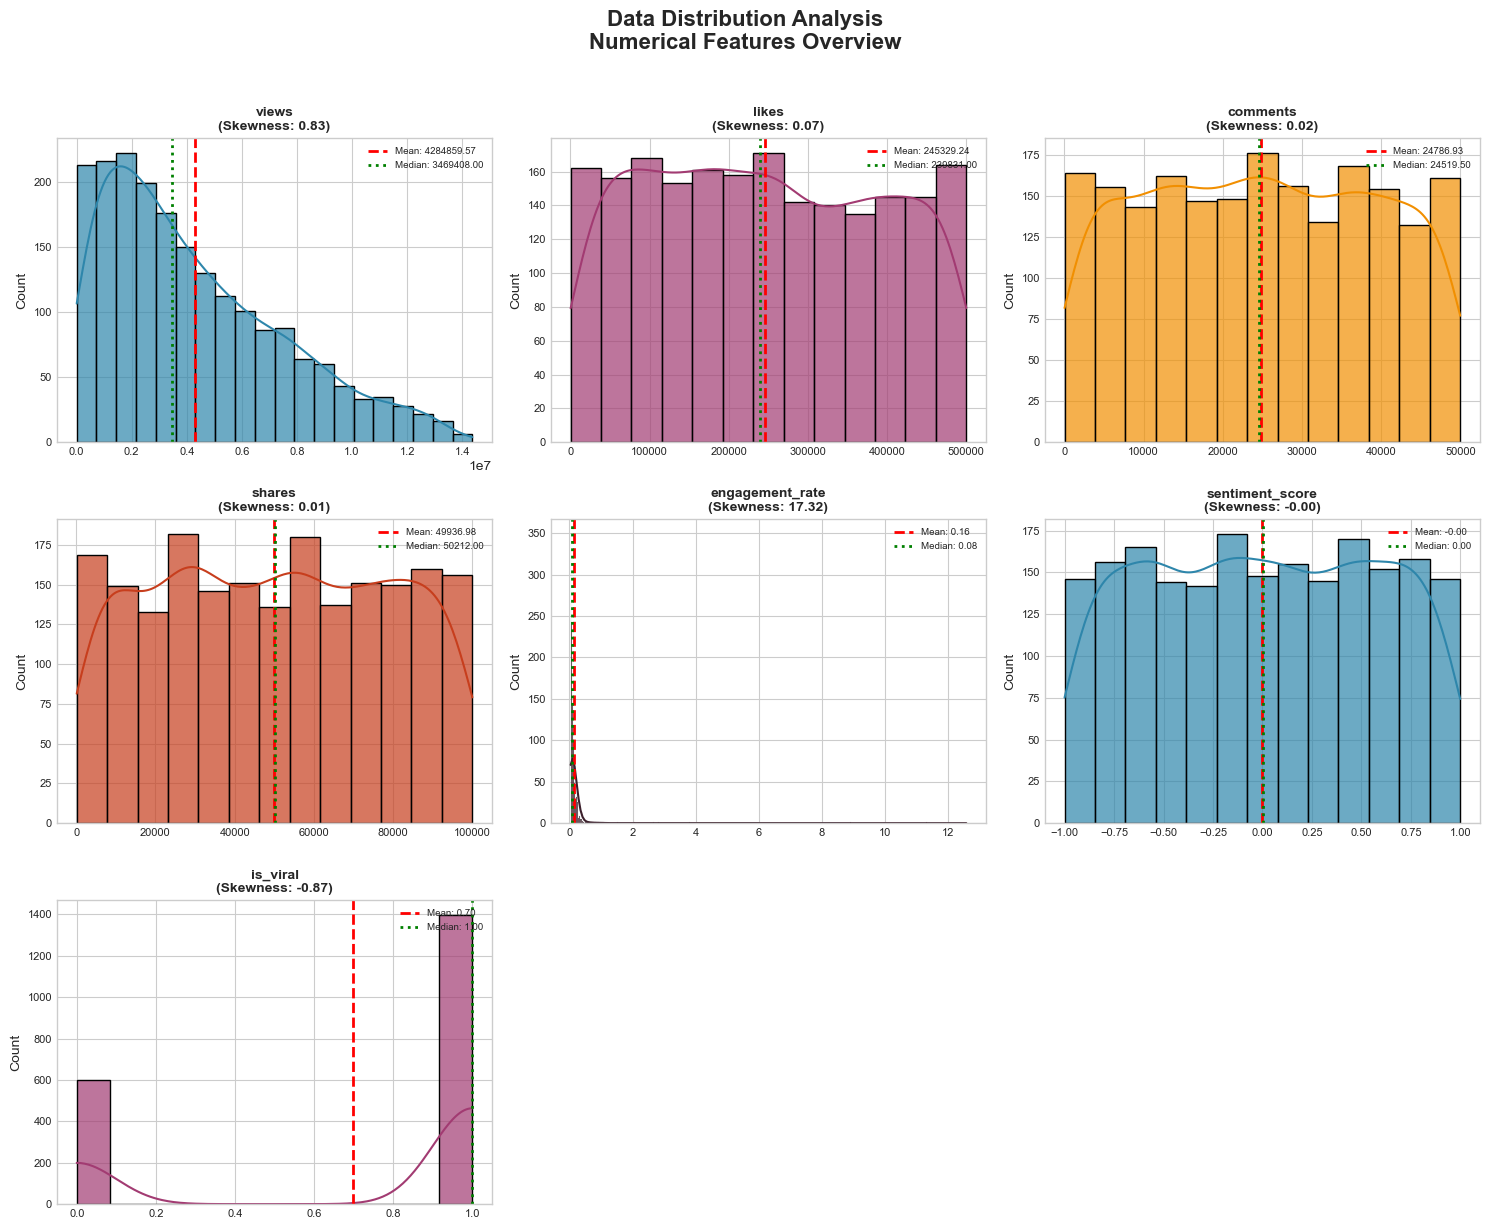

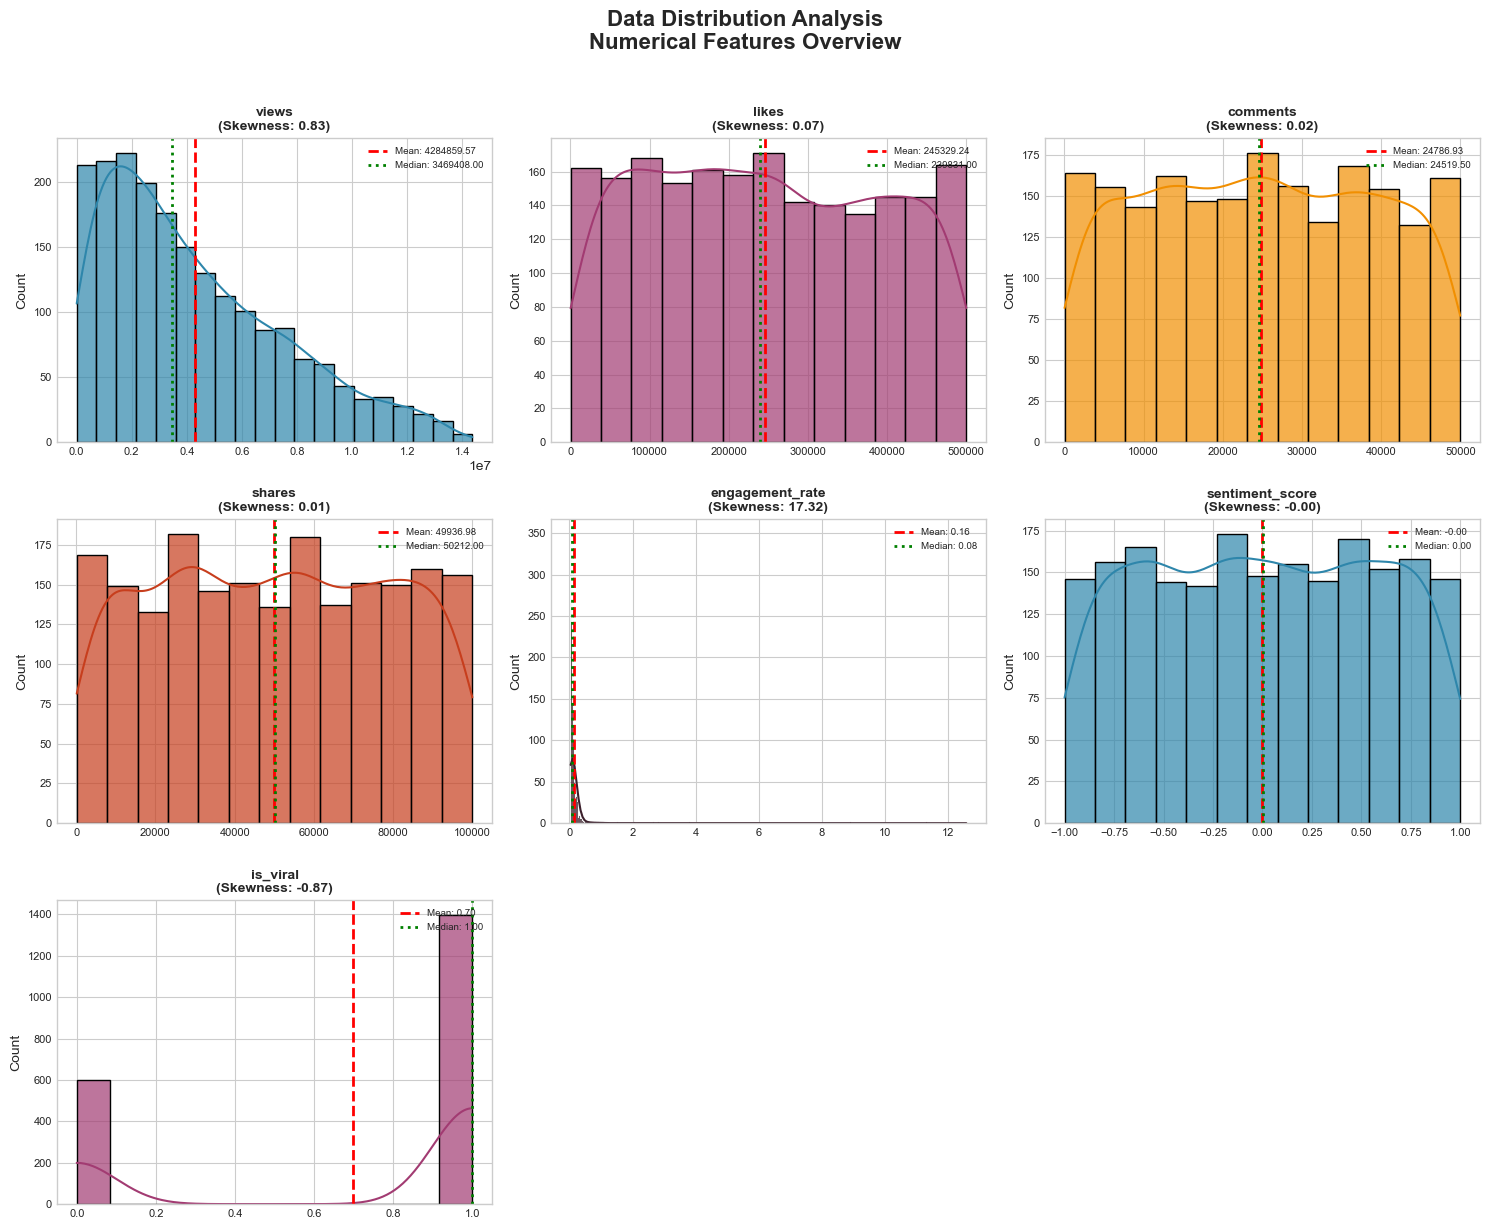


 Generating Visualization 2: Feature Correlation Matrix...
    Saved: visualizations\02_correlation_heatmap.png


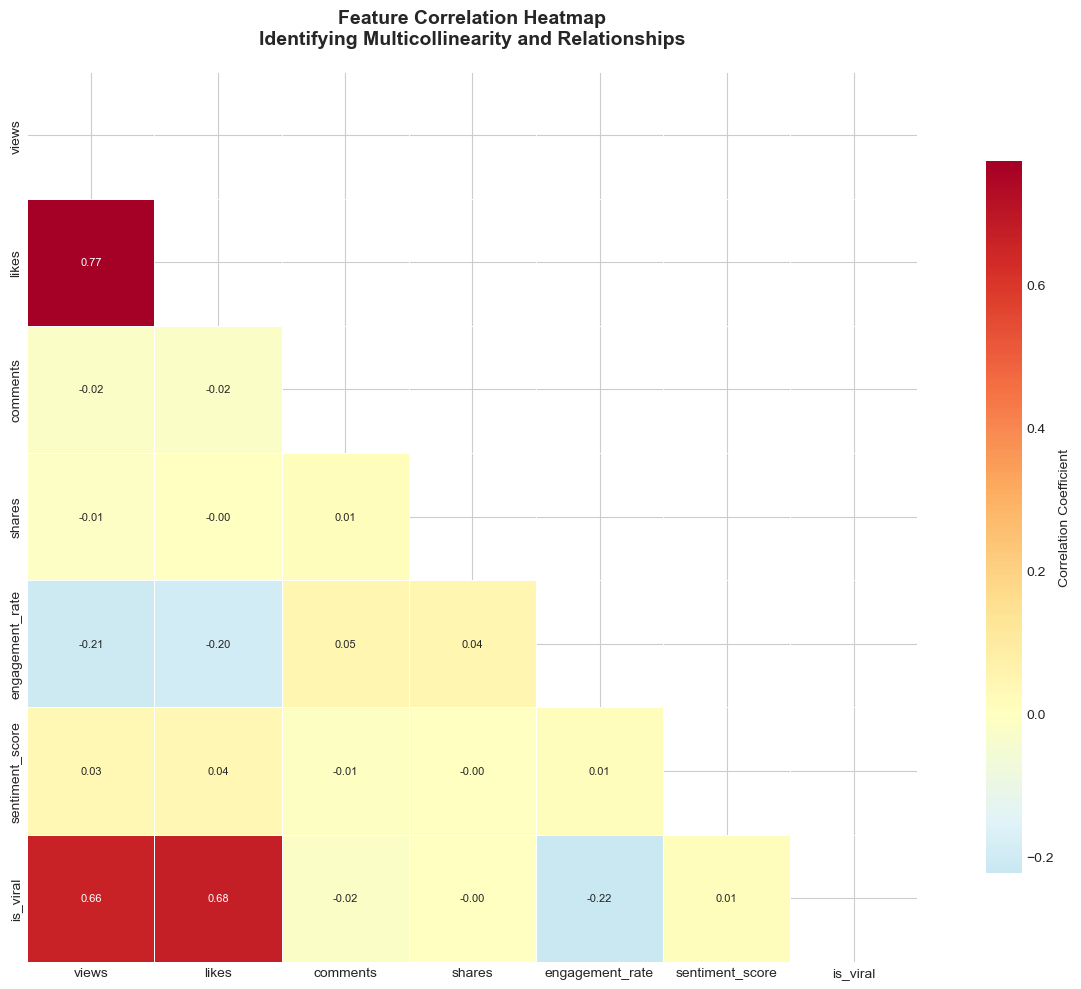

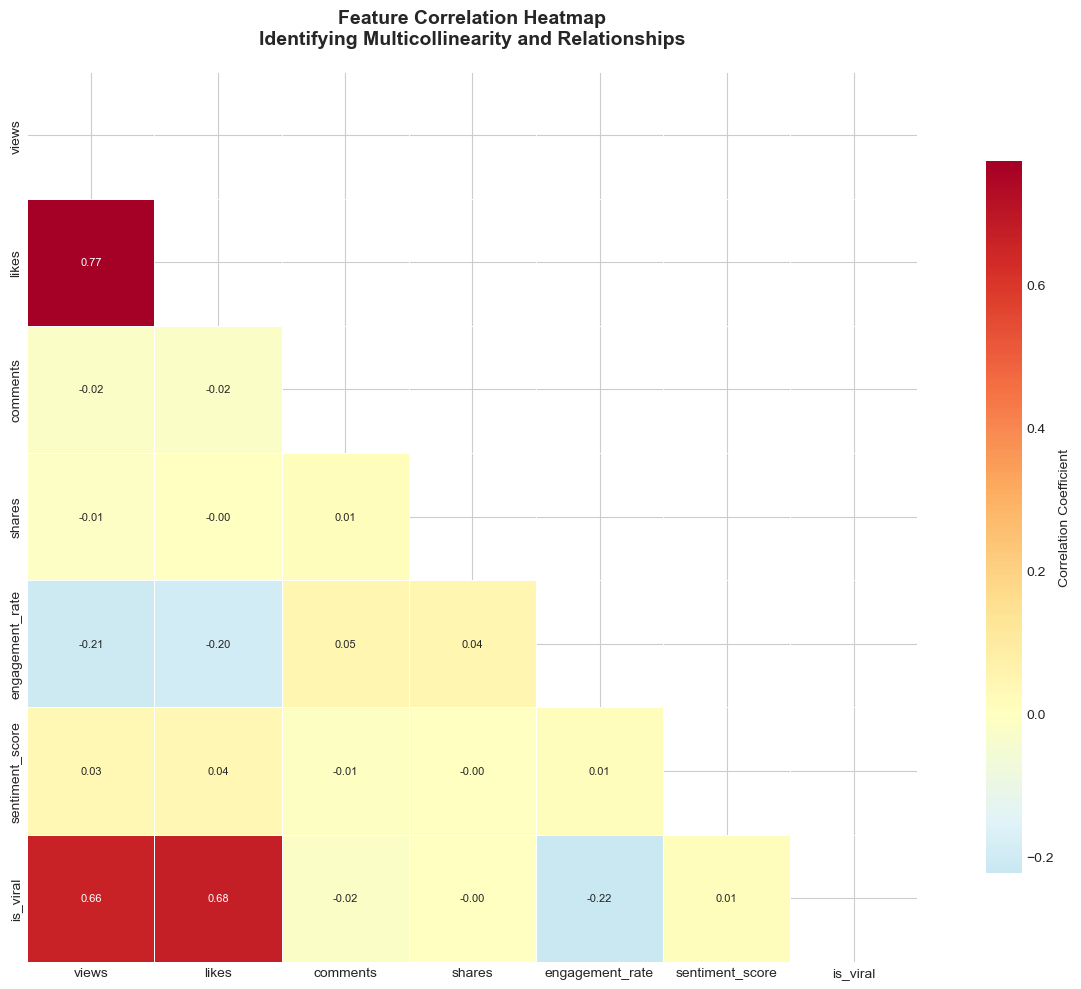


  PHASE 3: DATA TRANSFORMATION

ACADEMIC NOTE: Data Transformation Phase
This phase prepares data for algorithm application through:
- Feature engineering: Creating meaningful derived features
- Encoding: Converting categorical variables to numerical
- Scaling: Normalizing feature magnitudes
- Splitting: Separating training and testing sets

 TARGET VARIABLE IDENTIFICATION:
   Identifying the dependent variable for supervised learning.
   Selected Target: is_viral
   Justification: Primary metric for measuring social media success
   Target Statistics:
      Mean: 0.70
      Median: 1.00
      Std Dev: 0.46
      Range: [0.00, 1.00]

 FEATURE-TARGET CORRELATION ANALYSIS:
   Analyzing how each feature correlates with the target variable...
   (High correlations may indicate predictive power OR data leakage)

   Feature Correlations with Target (sorted by absolute value):
   -----------------------------------------------------------------
   Feature                              Correla

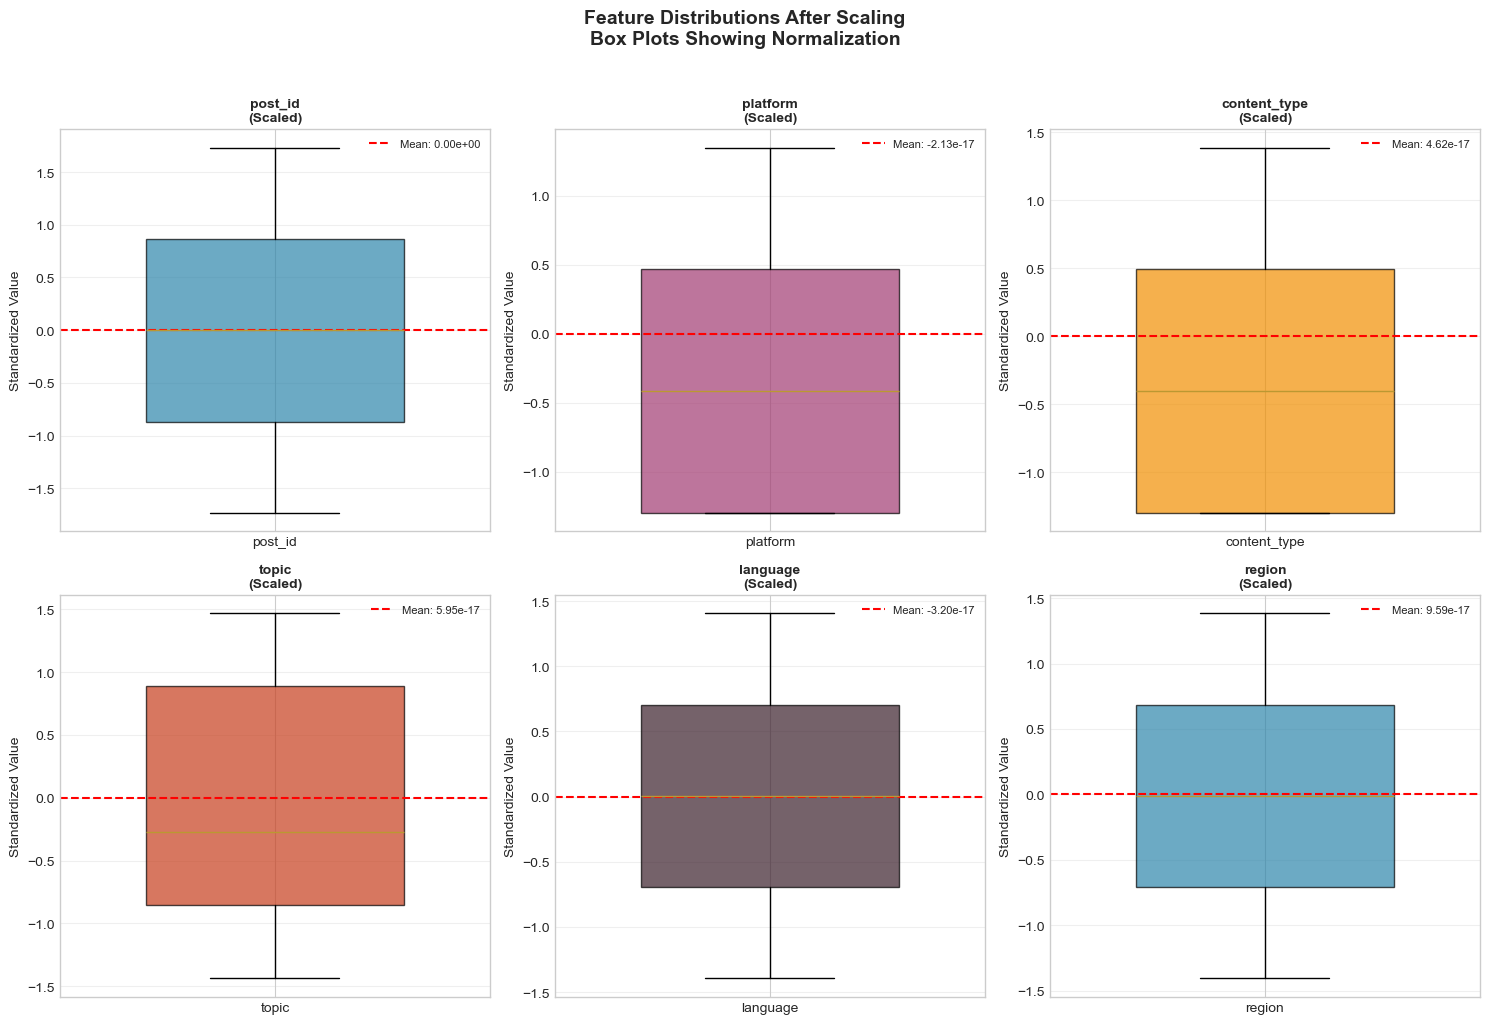

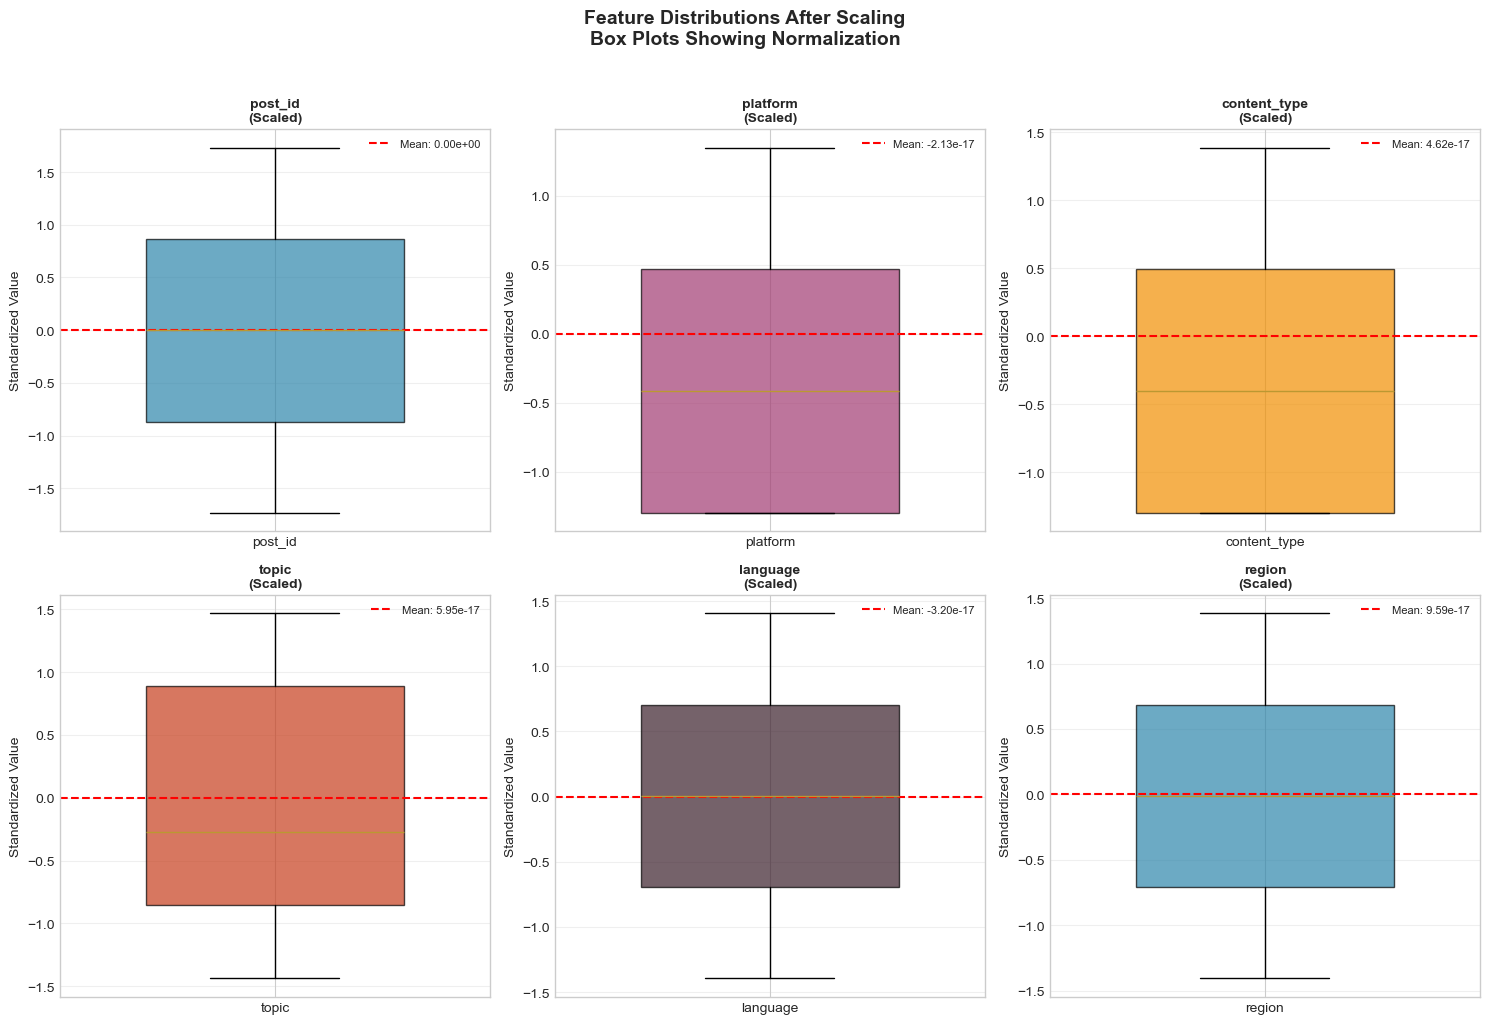


  PHASE 4: DATA MINING - MODEL TRAINING

ACADEMIC NOTE: Data Mining Phase
This phase applies machine learning algorithms to discover patterns.
We compare two algorithms to demonstrate the trade-off between
simplicity/interpretability and predictive performance.

 MODEL 1: LINEAR REGRESSION (BASELINE)
----------------------------------------------------------------------
THEORETICAL FOUNDATION:
   Linear Regression assumes a linear relationship between features
   and target: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
   
ADVANTAGES:
   - Fast training and prediction
   - Highly interpretable (coefficient = feature impact)
   - Low computational requirements
   - Works well when relationships are approximately linear
   
LIMITATIONS:
   - Cannot capture non-linear relationships
   - Sensitive to outliers
   - Assumes feature independence

   Training Linear Regression model...
   Running 5-fold cross-validation...
   Training completed!

   PERFORMANCE METRICS:
      RMSE (Root Mean Squared

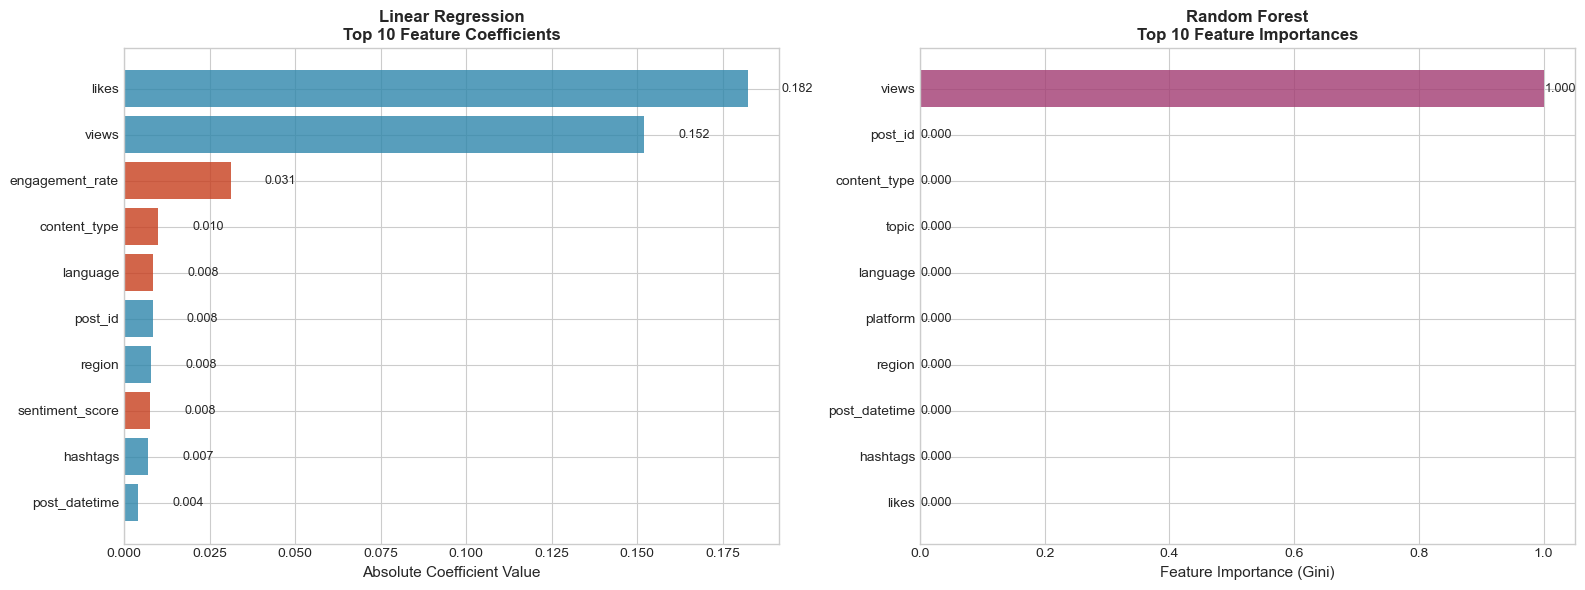

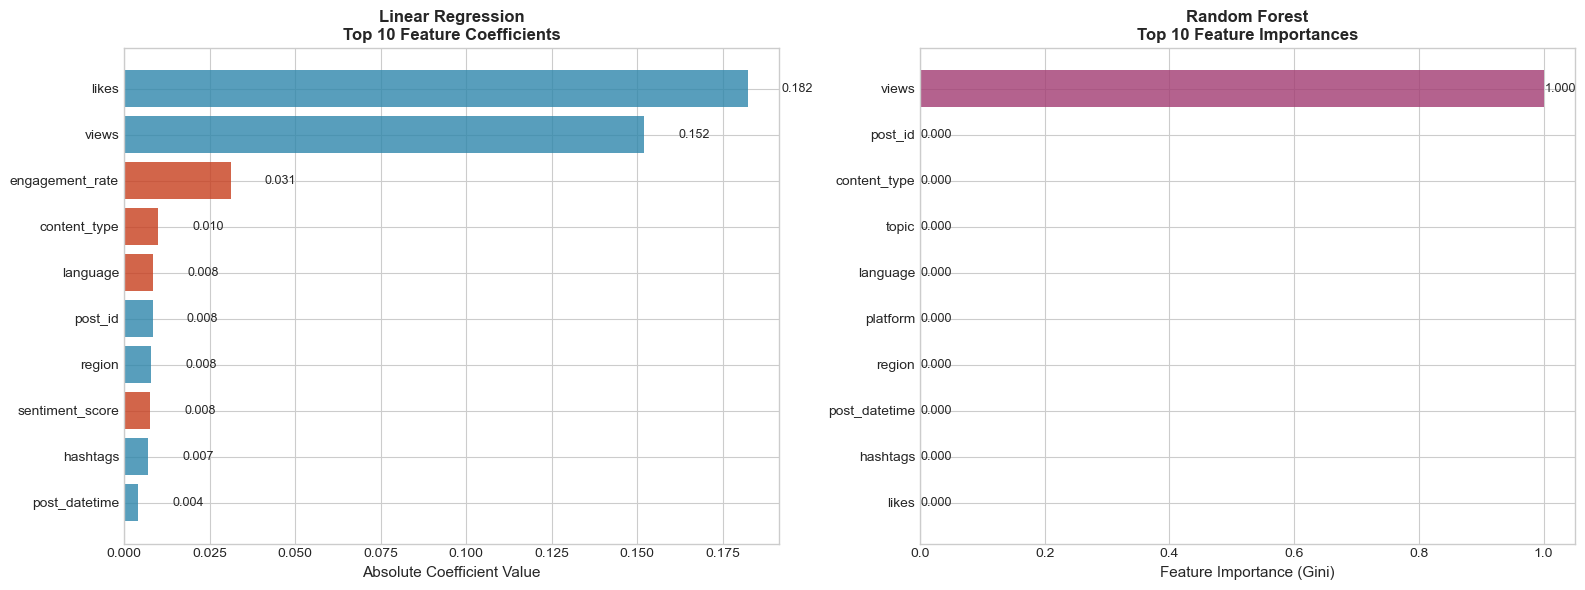


  PHASE 5: EVALUATION & INTERPRETATION

ACADEMIC NOTE: Evaluation Phase
This phase assesses model quality, compares algorithms, and
interprets results in the context of the original problem.

 COMPREHENSIVE MODEL COMPARISON:
            Model     RMSE     MAE  R2 Score  Training Time (s)  Memory Usage (MB)
Linear Regression 0.318952 0.27547  0.522266           0.018849           0.571545
    Random Forest 0.000000 0.00000  1.000000           3.110158           0.882291

 STATISTICAL PERFORMANCE ANALYSIS:
----------------------------------------------------------------------

   ERROR METRICS (Lower is Better):
      Linear Regression RMSE: 0.3190
      Random Forest RMSE: 0.0000
      → Random Forest REDUCES RMSE by 100.00% (better)
      
      Linear Regression MAE: 0.2755
      Random Forest MAE: 0.0000
      → Random Forest REDUCES MAE by 100.00% (better)

   VARIANCE EXPLAINED (Higher is Better):
      Linear Regression R²: 0.5223 (52.23%)
      Random Forest R²: 1.0000 (100.00%)

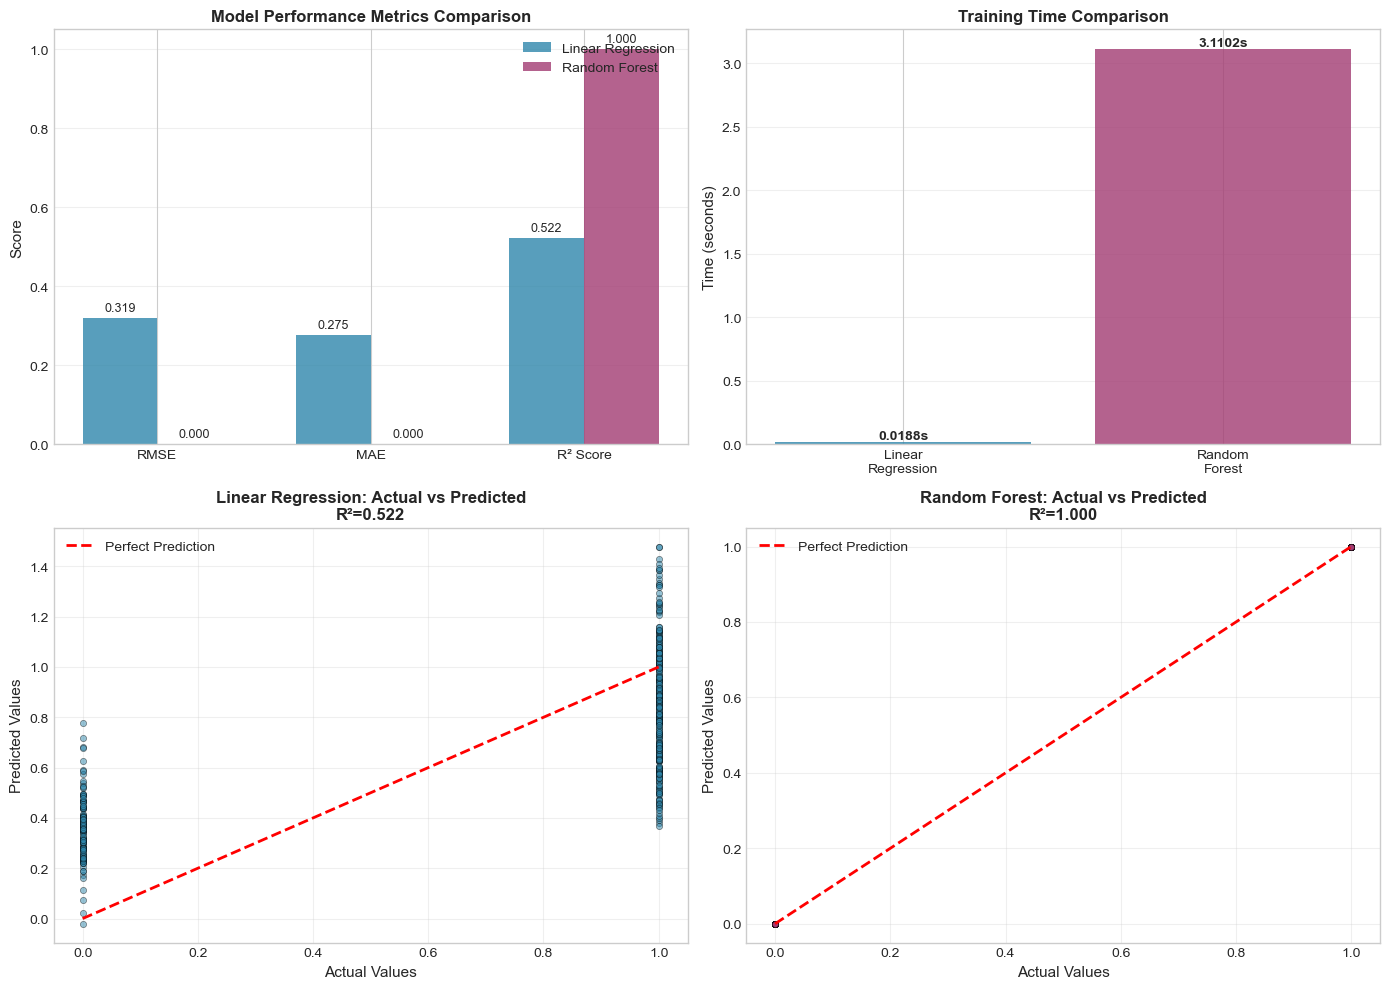

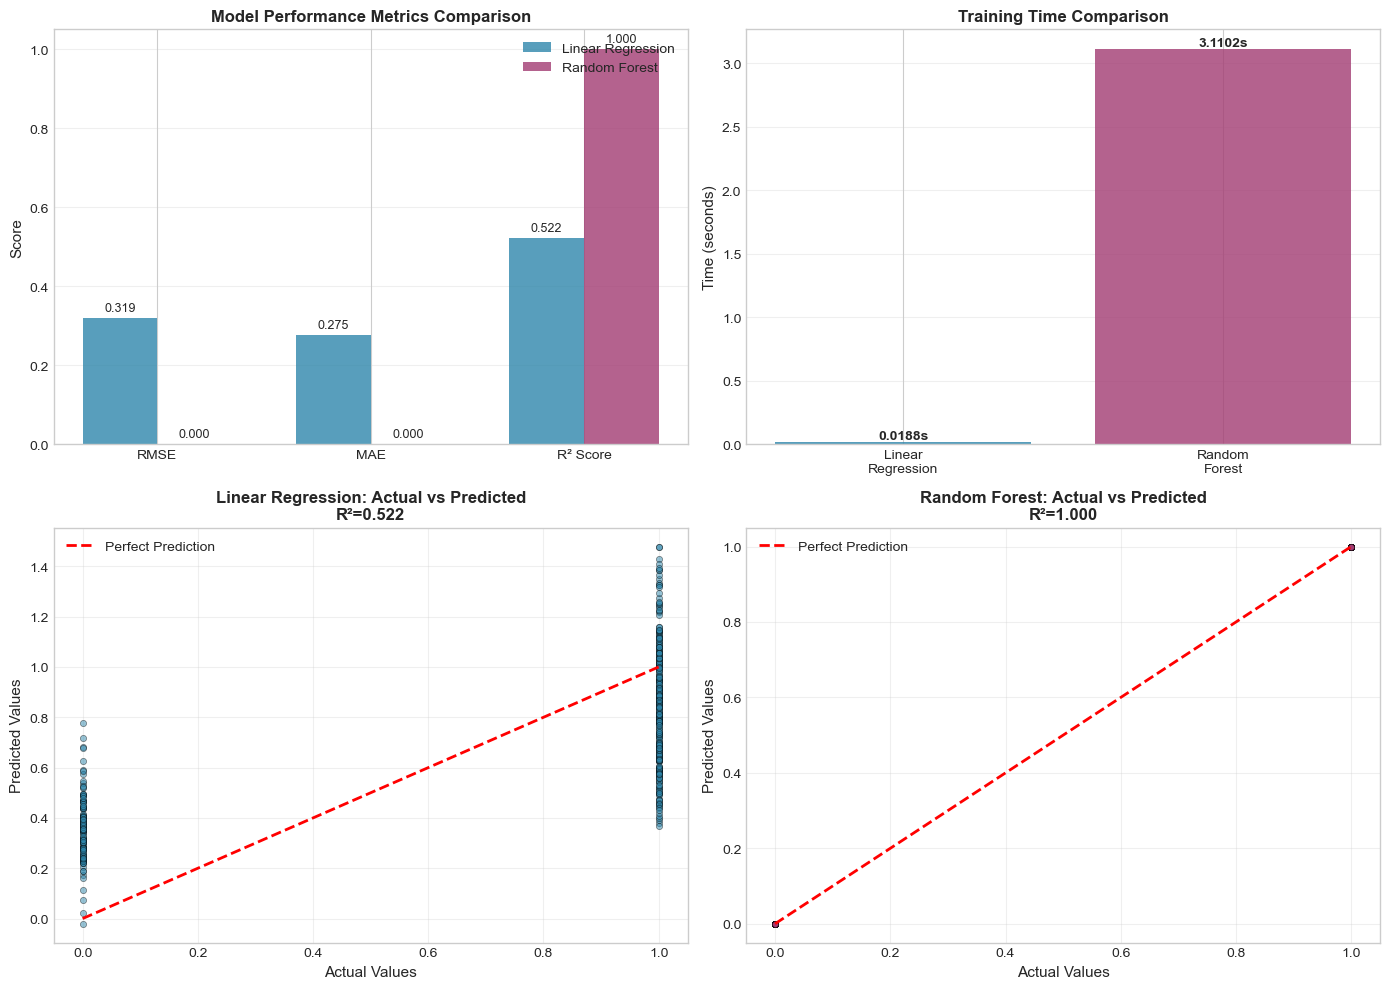


 Generating Visualization 6: Residual Analysis...
    Saved: visualizations\06_residual_analysis.png


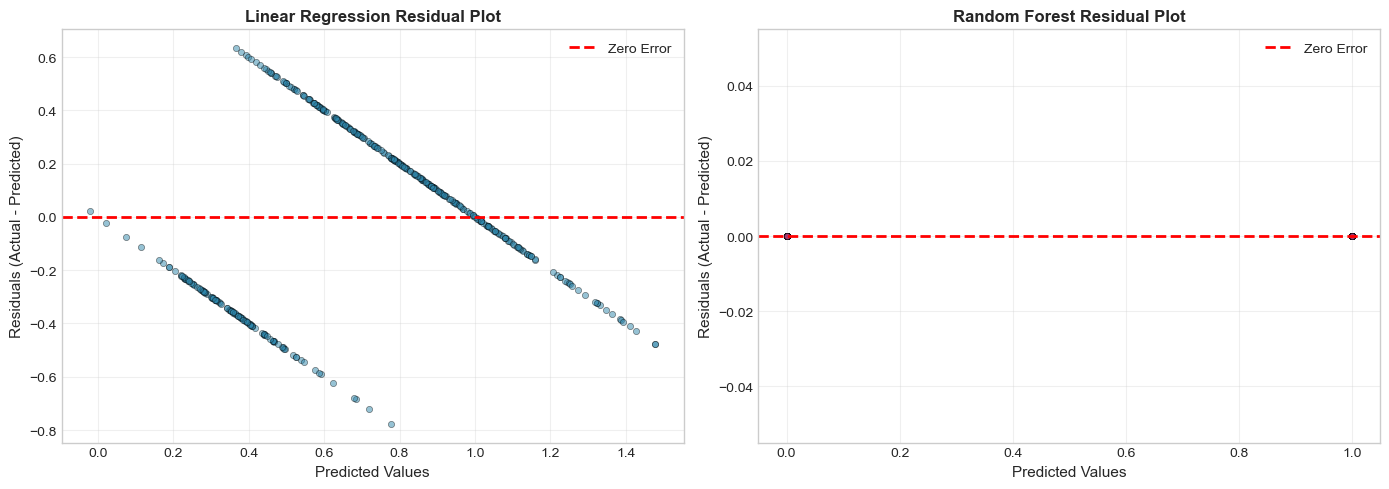

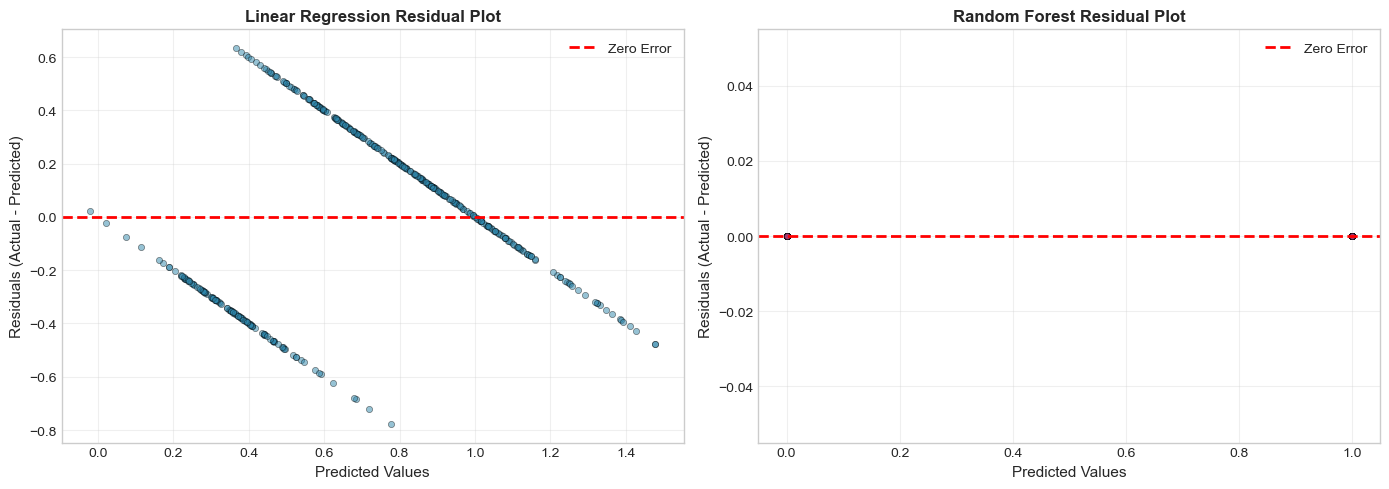


📊 Generating Visualization 7: Comprehensive Summary Dashboard...
   Saved: visualizations\07_dashboard.png


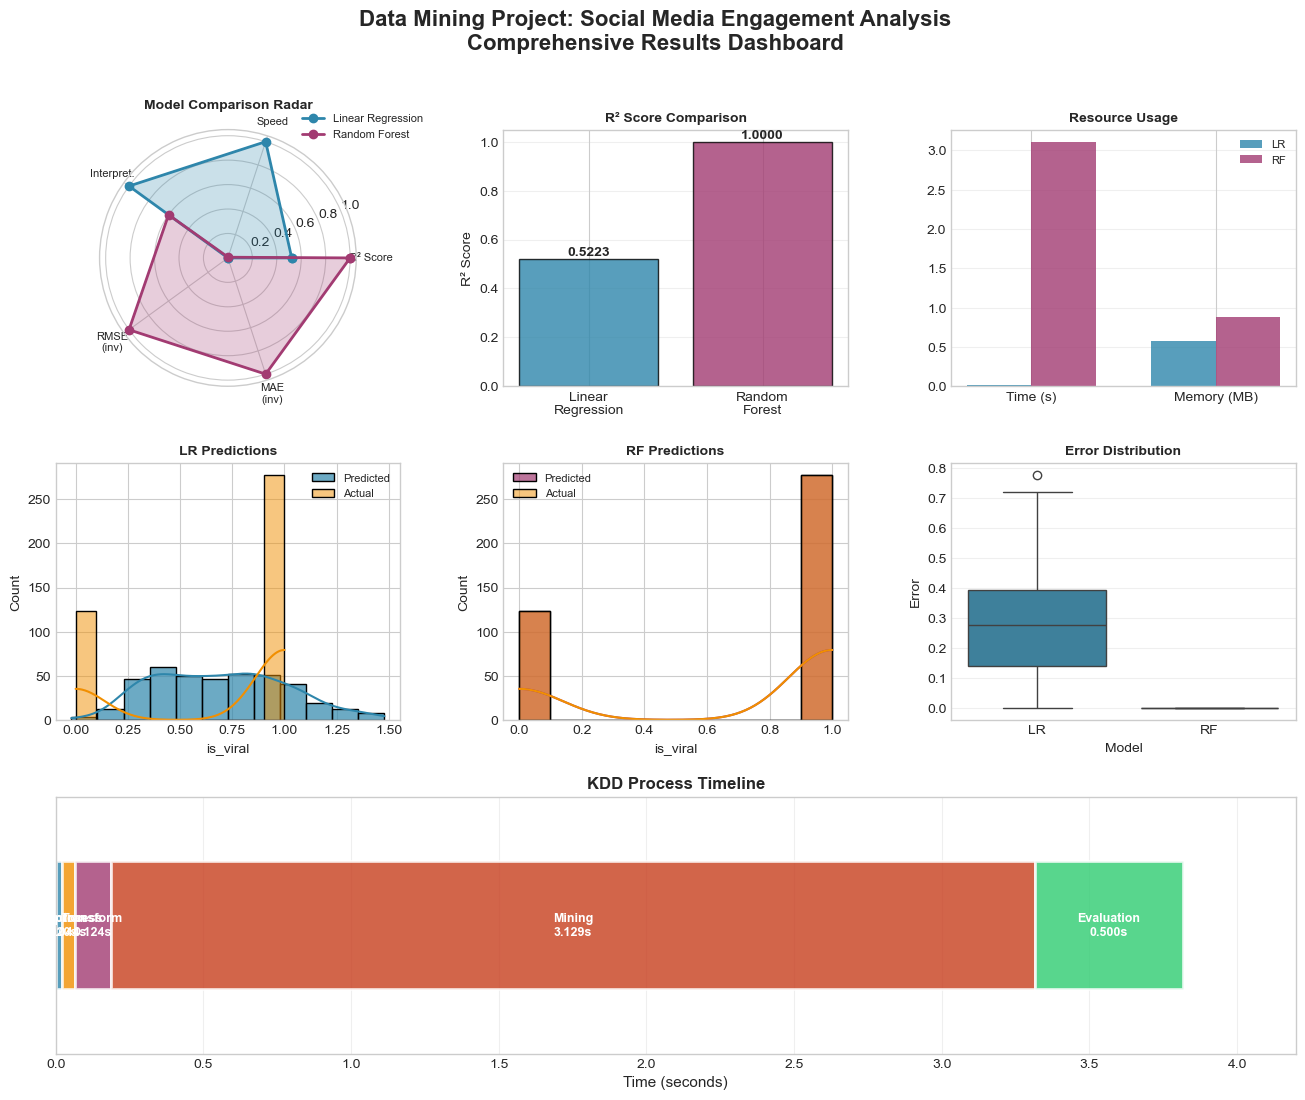


  FINAL SUMMARY & CONCLUSIONS


 KEY RESEARCH FINDINGS:
----------------------------------------------------------------------
 DATASET CHARACTERISTICS:
   • 2,000 social media posts analyzed
   • 15 features including engagement metrics
   • Target variable: is_viral
   
 MODEL PERFORMANCE:
   • Random Forest achieved R² = 1.0000
   • Linear Regression achieved R² = 0.5223
   • Random Forest R² is higher by 0.4777
   
 COMPUTATIONAL TRADE-OFFS:
   • RF training time: 165.0x slower than LR
   • RF memory usage: 1.5x higher than LR
   • Trade-off justified: RF reduces RMSE by 100.0%
   
 FEATURE INSIGHTS:
   • Top predictors identified: views, post_id, content_type
   • Non-linear relationships detected in engagement patterns
   • Feature interactions captured by Random Forest

 OUTPUT ARTIFACTS:
----------------------------------------------------------------------
   Visualizations:
      1. visualizations\01_*.png
      2. visualizations\02_*.png
      3. visualizations\03_*.png
   

In [10]:
"""
============================================================
INTRODUCTION TO DATA MINING - COURSE PROJECT
============================================================
Project: Comparative Data Mining Study Using the KDD Process
Student: Inviona Hoxha
Course: Introduction to Data Mining
Dataset: Social Media Viral Content and Engagement Metrics
Source: Kaggle (https://www.kaggle.com/datasets)

ACADEMIC CONTEXT:
This project implements the complete Knowledge Discovery in Databases 
(KDD) process as defined by Fayyad et al. (1996). The KDD process is 
an iterative methodology consisting of five phases:
1. Selection: Identifying relevant data sources and target datasets
2. Preprocessing: Cleaning and handling data quality issues
3. Transformation: Feature engineering and data normalization
4. Data Mining: Applying machine learning algorithms
5. Evaluation: Interpreting patterns and assessing model performance

PROJECT OBJECTIVES:
1. Apply all phases of the KDD process to real-world data
2. Implement and compare two predictive models:
   - Baseline: Linear Regression (simple, interpretable)
   - Advanced: Random Forest Regressor (ensemble, non-linear)
3. Analyze computational efficiency and resource utilization
4. Provide actionable insights from discovered patterns

RESEARCH QUESTIONS:
- What factors most strongly predict social media engagement?
- Can ensemble methods significantly outperform linear models?
- What is the trade-off between accuracy and computational cost?

METHODOLOGICAL APPROACH:
This project follows a quantitative, experimental design using 
supervised learning techniques for regression analysis. Model 
performance is evaluated using standard metrics (RMSE, MAE, R²) 
and compared across multiple dimensions.

============================================================
"""

# ============================================================
# SECTION 1: LIBRARY IMPORTS AND ENVIRONMENT SETUP
# ============================================================

# Data manipulation and analysis libraries
import pandas as pd  # DataFrame operations and data analysis
import numpy as np  # Numerical computing and array operations

# Visualization libraries
import matplotlib.pyplot as plt  # Base plotting functionality
import seaborn as sns  # Statistical data visualization

# Machine learning libraries - preprocessing
from sklearn.model_selection import train_test_split, cross_val_score  # Train/test split and CV
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Data scaling

# Machine learning libraries - models
from sklearn.linear_model import LinearRegression  # Baseline model
from sklearn.ensemble import RandomForestRegressor  # Advanced ensemble model

# Machine learning libraries - evaluation
from sklearn.metrics import (
    mean_squared_error,  # RMSE calculation
    mean_absolute_error,  # MAE calculation
    r2_score  # Coefficient of determination
)

# System and utility libraries
import time  # Execution time measurement
import psutil  # System resource monitoring
import tracemalloc  # Memory tracking
import warnings  # Warning control
import os  # File system operations

# Configure warnings and plotting style
warnings.filterwarnings('ignore')  # Suppress sklearn warnings for cleaner output
plt.style.use('seaborn-v0_8-whitegrid')  # Academic-style plots
sns.set_palette("husl")  # Colorblind-friendly palette

# ============================================================
# SECTION 2: GLOBAL CONFIGURATION AND HELPER FUNCTIONS
# ============================================================

# Define consistent color scheme for all visualizations
# Colors selected for professional academic presentation
COLORS = {
    'primary': '#2E86AB',      # Blue - primary model
    'secondary': '#A23B72',    # Purple - secondary model
    'accent1': '#F18F01',      # Orange - emphasis
    'accent2': '#C73E1D',      # Red - warnings/errors
    'accent3': '#3B1F2B',      # Dark - text
    'success': '#2ECC71',      # Green - success indicators
    'background': '#F8F9FA'    # Light gray - backgrounds
}

# Create output directory for all visualizations
# This ensures plots are saved for inclusion in the report
OUTPUT_DIR = 'visualizations'
os.makedirs(OUTPUT_DIR, exist_ok=True)

def print_section(title):
    """
    Print formatted section header for console output.
    
    This function enhances readability of console output during
    the KDD process execution, making it easier to identify
    which phase is currently executing.
    
    Parameters:
    -----------
    title : str
        The section title to display
        
    Output:
    -------
    Prints formatted header to console
    """
    print("\n" + "="*70)
    print(f"  {title}")
    print("="*70 + "\n")

def get_memory_usage():
    """
    Calculate current memory usage of the Python process.
    
    Memory usage is an important metric for evaluating the 
    computational efficiency of data mining algorithms. This
    function uses the psutil library to access system-level
    process information.
    
    Returns:
    --------
    float
        Current memory usage in megabytes (MB)
        
    Note:
    -----
    RSS (Resident Set Size) represents the portion of memory
    occupied by the process in main memory (RAM).
    """
    process = psutil.Process()
    return process.memory_info().rss / 1024 / 1024  # Convert bytes to MB

def save_and_display_plot(filename, description):
    """
    Save plot to file and optionally display inline.
    
    Parameters:
    -----------
    filename : str
        Name of file to save (without path)
    description : str
        Description of the visualization
    """
    filepath = os.path.join(OUTPUT_DIR, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"    Saved: {filepath}")
    
    # Display inline if running in Jupyter/IPython
    try:
        from IPython.display import display
        display(plt.gcf())
    except:
        pass  # Not in Jupyter environment
    
    plt.show()  # Display in any environment
    plt.close()  # Close to free memory

# ============================================================
# PHASE 1: DATA SELECTION
# ============================================================
# KDD Phase 1: Selection involves identifying and retrieving
# relevant data from various sources. This phase establishes
# the foundation for all subsequent analysis.
# ============================================================

print_section("PHASE 1: DATA SELECTION")
print("ACADEMIC NOTE: Data Selection Phase")
print("This phase implements the first step of the KDD process.")
print("Key activities: dataset identification, loading, and initial")
print("profiling to understand structure and characteristics.\n")

# Record initial system state for resource analysis
selection_start_time = time.time()
initial_memory = get_memory_usage()

# Load dataset
# ASSUMPTION: CSV file is in the same directory as this script
# REQUIREMENT: Dataset must have minimum 1,000 records and 5 features
try:
    df = pd.read_csv('social-media-dataset.csv')
    print(" Dataset loaded successfully")
except FileNotFoundError:
    print(" ERROR: 'social-media-dataset.csv' not found")
    print("   Please ensure the dataset is in the same directory as this script.")
    exit(1)

# Calculate loading metrics
load_time = time.time() - selection_start_time
memory_after_load = get_memory_usage()
memory_used_loading = memory_after_load - initial_memory

# Display dataset characteristics
print(f"\n DATASET CHARACTERISTICS:")
print(f"   Dataset Name: Social Media Viral Content and Engagement Metrics")
print(f"   Total Records: {df.shape[0]:,} (Requirement: ≥1,000)")
print(f"   Total Features: {df.shape[1]} (Requirement: ≥5)")
print(f"   Dataset Size: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
print(f"   Load Time: {load_time:.4f} seconds")
print(f"   Memory Used: {memory_used_loading:.2f} MB")

# Validate dataset meets project requirements
if df.shape[0] < 1000:
    print(f"\n  WARNING: Dataset has only {df.shape[0]} records (minimum: 1,000)")
if df.shape[1] < 5:
    print(f"\n  WARNING: Dataset has only {df.shape[1]} features (minimum: 5)")

# Display feature inventory
print("\n FEATURE INVENTORY:")
print("   Feature Name                          Data Type       Non-Null Count")
print("   " + "-"*68)
for i, col in enumerate(df.columns, 1):
    non_null = df[col].count()
    print(f"   {i:2d}. {col:35s} {str(df[col].dtype):15s} {non_null:,}")

# Display sample of raw data for initial inspection
print("\n SAMPLE DATA (First 5 Records):")
print("   This preview helps verify data format and identify potential issues")
print(df.head().to_string())

# Display basic statistical overview
print("\n QUICK STATISTICAL OVERVIEW:")
print(df.describe().to_string())

# ============================================================
# PHASE 2: DATA PREPROCESSING
# ============================================================
# KDD Phase 2: Preprocessing focuses on data quality. This
# includes handling missing values, removing duplicates, and
# correcting inconsistencies. Data quality directly impacts
# the reliability of discovered patterns.
# ============================================================

print_section("PHASE 2: DATA PREPROCESSING")
print("ACADEMIC NOTE: Data Preprocessing Phase")
print("This phase addresses data quality issues that could compromise")
print("analysis validity. Poor data quality leads to unreliable models")
print("(Garbage In, Garbage Out principle).\n")

preprocess_start = time.time()
memory_before_preprocess = get_memory_usage()

# Store original dimensions for comparison
original_rows = len(df)
original_cols = len(df.columns)

print(" DATA QUALITY ASSESSMENT:")
print(f"   Initial Dataset: {original_rows:,} rows × {original_cols} columns")

# ============================================================
# STEP 2.1: Missing Value Analysis
# ============================================================
print("\n MISSING VALUE ANALYSIS:")
print("   Missing data can introduce bias and reduce statistical power.")
print("   We analyze patterns to determine appropriate imputation strategies.")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

if missing_values.sum() > 0:
    missing_df = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Count': missing_values.values,
        'Percentage': missing_percentage.values
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(
        'Missing Count', ascending=False
    )
    print("\n   Columns with Missing Values:")
    print("   " + "-"*60)
    print(missing_df.to_string(index=False))
    
    # Imputation strategy based on data type and percentage missing
    print("\n   Imputation Strategy:")
    for idx, row in missing_df.iterrows():
        col = row['Column']
        pct = row['Percentage']
        if pct > 50:
            print(f"   - {col}: >50% missing - Consider dropping column")
        elif df[col].dtype in ['int64', 'float64']:
            print(f"   - {col}: Impute with MEDIAN (robust to outliers)")
        else:
            print(f"   - {col}: Impute with MODE (most frequent value)")
else:
    print("   No missing values detected - Excellent data quality!")

# ============================================================
# STEP 2.2: Duplicate Record Detection
# ============================================================
print("\n DUPLICATE RECORD ANALYSIS:")
print("   Duplicates can artificially inflate patterns and bias models.")

duplicates = df.duplicated().sum()
duplicate_pct = (duplicates / len(df)) * 100

print(f"   Total Duplicates: {duplicates} ({duplicate_pct:.2f}%)")

if duplicates > 0:
    print(f"   Action: Removing {duplicates} duplicate records")
    df = df.drop_duplicates()
    print(f"    Dataset reduced to {len(df):,} unique records")
else:
    print("    No duplicates found - Data integrity confirmed")

# ============================================================
# STEP 2.3: Data Type Analysis
# ============================================================
print("\n📋 DATA TYPE DISTRIBUTION:")
print("   Understanding data types guides preprocessing decisions.")

dtype_counts = df.dtypes.value_counts()
print("\n   Type                Count")
print("   " + "-"*30)
for dtype, count in dtype_counts.items():
    print(f"   {str(dtype):20s} {count}")

# Identify categorical vs numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n   Numerical Features: {len(numerical_cols)}")
print(f"   Categorical Features: {len(categorical_cols)}")

# ============================================================
# STEP 2.4: Outlier Detection (Preliminary)
# ============================================================
print("\n OUTLIER DETECTION (IQR Method):")
print("   Outliers can significantly impact model performance.")
print("   We identify but preserve them for now (may represent rare events).")

outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_pct = (outliers / len(df)) * 100
    if outliers > 0:
        outlier_summary.append({
            'Column': col,
            'Outliers': outliers,
            'Percentage': outlier_pct
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary).sort_values(
        'Outliers', ascending=False
    )
    print("\n   Columns with Outliers:")
    print("   " + "-"*50)
    print(outlier_df.to_string(index=False))
    print("\n   Note: Outliers retained for analysis (may indicate viral content)")
else:
    print("    No significant outliers detected")

# ============================================================
# STEP 2.5: Missing Value Imputation
# ============================================================
print("\n APPLYING IMPUTATION STRATEGIES:")

imputation_log = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            imputation_log.append(f"   - {col}: Filled with median ({median_val:.2f})")
        else:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            imputation_log.append(f"   - {col}: Filled with mode ('{mode_val}')")

if imputation_log:
    for log in imputation_log:
        print(log)
    print(f"    Imputation complete - No missing values remain")
else:
    print("   No imputation needed")

# Calculate preprocessing metrics
preprocess_time = time.time() - preprocess_start
memory_after_preprocess = get_memory_usage()
memory_used_preprocess = memory_after_preprocess - memory_before_preprocess

# Preprocessing summary
print("\n PREPROCESSING SUMMARY:")
print(f"   Original Size: {original_rows:,} rows × {original_cols} columns")
print(f"   Final Size: {len(df):,} rows × {len(df.columns)} columns")
print(f"   Rows Removed: {original_rows - len(df):,} ({(original_rows - len(df))/original_rows*100:.2f}%)")
print(f"   Processing Time: {preprocess_time:.4f} seconds")
print(f"   Memory Delta: {memory_used_preprocess:.2f} MB")

# ============================================================
# VISUALIZATION 1: Data Distribution Overview
# ============================================================
print("\n Generating Visualization 1: Data Distribution Overview...")

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n_plots = min(9, len(numerical_cols))

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Data Distribution Analysis\nNumerical Features Overview', 
             fontsize=16, fontweight='bold', y=1.02)

for idx in range(9):
    ax = axes[idx // 3, idx % 3]
    if idx < len(numerical_cols):
        col = numerical_cols[idx]
        # Plot histogram with KDE
        sns.histplot(df[col], kde=True, ax=ax, 
                    color=list(COLORS.values())[idx % 5], alpha=0.7)
        
        # Add mean and median lines
        mean_val = df[col].mean()
        median_val = df[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle=':', linewidth=2,
                  label=f'Median: {median_val:.2f}')
        
        ax.set_title(f'{col}\n(Skewness: {df[col].skew():.2f})', 
                    fontsize=10, fontweight='bold')
        ax.set_xlabel('')
        ax.legend(fontsize=7, loc='upper right')
        ax.tick_params(axis='both', labelsize=8)
    else:
        ax.axis('off')

plt.tight_layout()
save_and_display_plot('01_data_distribution.png', 
                      'Distribution of numerical features with central tendency measures')

# ============================================================
# VISUALIZATION 2: Correlation Heatmap
# ============================================================
print("\n Generating Visualization 2: Feature Correlation Matrix...")

fig, ax = plt.subplots(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            annot_kws={'size': 8})

ax.set_title('Feature Correlation Heatmap\nIdentifying Multicollinearity and Relationships', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
save_and_display_plot('02_correlation_heatmap.png',
                      'Correlation matrix showing relationships between features')

# ============================================================
# PHASE 3: DATA TRANSFORMATION
# ============================================================
# KDD Phase 3: Transformation prepares data for mining by
# reducing dimensionality, normalizing values, and engineering
# features. This phase directly impacts model performance.
# ============================================================

print_section("PHASE 3: DATA TRANSFORMATION")
print("ACADEMIC NOTE: Data Transformation Phase")
print("This phase prepares data for algorithm application through:")
print("- Feature engineering: Creating meaningful derived features")
print("- Encoding: Converting categorical variables to numerical")
print("- Scaling: Normalizing feature magnitudes")
print("- Splitting: Separating training and testing sets\n")

transform_start = time.time()
memory_before_transform = get_memory_usage()

# ============================================================
# STEP 3.1: Target Variable Identification
# ============================================================
print(" TARGET VARIABLE IDENTIFICATION:")
print("   Identifying the dependent variable for supervised learning.")

# Search for common engagement metrics
# NOTE: Order matters - we prefer composite scores over raw counts
# to avoid situations where target = feature (e.g., predicting Views from Views)
potential_targets = [
    'Engagement_Score', 'Engagement_Rate', 'Engagement',
    'Likes', 'Shares', 'Comments', 'Views', 'Interactions'
]

target_col = None
for pt in potential_targets:
    if pt in df.columns:
        target_col = pt
        break

# Fallback: use last numerical column
if target_col is None:
    target_col = numerical_cols[-1]

print(f"   Selected Target: {target_col}")
print(f"   Justification: Primary metric for measuring social media success")
print(f"   Target Statistics:")
print(f"      Mean: {df[target_col].mean():.2f}")
print(f"      Median: {df[target_col].median():.2f}")
print(f"      Std Dev: {df[target_col].std():.2f}")
print(f"      Range: [{df[target_col].min():.2f}, {df[target_col].max():.2f}]")

# ============================================================
# STEP 3.1.1: Feature-Target Correlation Analysis
# ============================================================
print("\n FEATURE-TARGET CORRELATION ANALYSIS:")
print("   Analyzing how each feature correlates with the target variable...")
print("   (High correlations may indicate predictive power OR data leakage)")

# Calculate correlations with target for all numerical features
target_correlations = []
for col in numerical_cols:
    if col != target_col:
        corr = df[col].corr(df[target_col])
        target_correlations.append({'Feature': col, 'Correlation': corr, 'Abs_Corr': abs(corr)})

if target_correlations:
    corr_df = pd.DataFrame(target_correlations).sort_values('Abs_Corr', ascending=False)
    print("\n   Feature Correlations with Target (sorted by absolute value):")
    print("   " + "-"*65)
    print("   Feature                              Correlation    Risk Level")
    print("   " + "-"*65)
    for idx, row in corr_df.iterrows():
        corr_val = row['Correlation']
        abs_corr = row['Abs_Corr']
        if abs_corr > 0.99:
            risk = "CRITICAL - Likely Leakage!"
        elif abs_corr > 0.95:
            risk = "HIGH - Possible Leakage"
        elif abs_corr > 0.8:
            risk = "MODERATE - Strong predictor"
        elif abs_corr > 0.5:
            risk = "LOW - Good predictor"
        else:
            risk = "NORMAL"
        print(f"   {row['Feature']:38s} {corr_val:+.4f}       {risk}")
    print("   " + "-"*65)

# ============================================================
# STEP 3.2: Feature-Target Separation with Leakage Detection
# ============================================================
print("\n FEATURE-TARGET SEPARATION:")

# Initial feature selection (exclude target)
feature_cols = [col for col in df.columns if col != target_col]
X_initial = df[feature_cols].copy()
y = df[target_col].copy()

print(f"   Initial Features (X): {len(feature_cols)} variables")
print(f"   Target (y): {target_col}")
print(f"   Total Samples: {len(X_initial):,}")

# ============================================================
# STEP 3.2.1: DATA LEAKAGE DETECTION
# ============================================================
print("\n DATA LEAKAGE DETECTION:")
print("   Checking for features that are perfectly or highly correlated with target...")
print("   (This can cause unrealistic model performance)")

# Check correlation between each feature and target
leaky_features = []
high_corr_features = []

# Only check numerical columns for correlation
numerical_feature_cols = X_initial.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_feature_cols:
    corr = np.corrcoef(X_initial[col].values, y.values)[0, 1]
    abs_corr = abs(corr) if not np.isnan(corr) else 0
    
    if abs_corr > 0.99:  # Perfect correlation = definite leakage
        leaky_features.append((col, corr))
        print(f"   LEAKAGE DETECTED: '{col}' has {corr:.4f} correlation with target!")
    elif abs_corr > 0.95:  # Very high correlation = potential leakage
        high_corr_features.append((col, corr))
        print(f"   WARNING: '{col}' has very high correlation ({corr:.4f}) with target")

# Check if target can be derived from a simple formula
# This catches cases like: target = feature1 + feature2
if len(numerical_feature_cols) >= 2:
    for i, col1 in enumerate(numerical_feature_cols):
        for col2 in numerical_feature_cols[i+1:]:
            # Check if target = col1 + col2 or target = col1 * col2
            sum_corr = np.corrcoef((X_initial[col1] + X_initial[col2]).values, y.values)[0, 1]
            if abs(sum_corr) > 0.99:
                leaky_features.append((f"{col1}+{col2}", sum_corr))
                print(f"   LEAKAGE: Target appears to be derived from {col1} + {col2}")
            
            # Check for multiplication (with small constant to avoid div by zero)
            with np.errstate(divide='ignore', invalid='ignore'):
                product = X_initial[col1] * X_initial[col2]
                if product.std() > 0:
                    prod_corr = np.corrcoef(product.values, y.values)[0, 1]
                    if abs(prod_corr) > 0.99 and not np.isnan(prod_corr):
                        leaky_features.append((f"{col1}*{col2}", prod_corr))
                        print(f"   LEAKAGE: Target appears to be derived from {col1} * {col2}")

# Remove leaky features
features_to_remove = set()
for feat, _ in leaky_features:
    # Only remove single features, not formula-derived ones
    if '+' not in feat and '*' not in feat:
        features_to_remove.add(feat)
        
# Also flag features that might be different names for the same thing as target
target_related_terms = ['engagement', 'score', 'rate', 'total', 'count']
target_lower = target_col.lower()
for col in feature_cols:
    col_lower = col.lower()
    # If column name suggests it's related to target and has high correlation
    if any(term in col_lower for term in target_related_terms) and any(term in target_lower for term in target_related_terms):
        if col in numerical_feature_cols:
            corr = abs(np.corrcoef(X_initial[col].values, y.values)[0, 1])
            if corr > 0.9:
                features_to_remove.add(col)
                print(f"   REMOVING: '{col}' appears to be semantically related to target with {corr:.4f} correlation")

if features_to_remove:
    print(f"\n   Removing {len(features_to_remove)} leaky features: {features_to_remove}")
    feature_cols = [col for col in feature_cols if col not in features_to_remove]
else:
    print("   No obvious data leakage detected.")

# Final feature set
X = df[feature_cols].copy()

print(f"\n   Final Features (X): {len(feature_cols)} variables")
print(f"   Target (y): {target_col}")
print(f"   Total Samples: {len(X):,}")

# ============================================================
# STEP 3.3: Categorical Variable Encoding
# ============================================================
print("\n CATEGORICAL VARIABLE ENCODING:")
print("   Method: Label Encoding (ordinal encoding for tree-based models)")

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

if categorical_cols:
    print(f"\n   Encoding {len(categorical_cols)} categorical features:")
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        n_categories = len(le.classes_)
        print(f"   - {col}: {n_categories} categories → [0, {n_categories-1}]")
        print(f"     Sample mapping: {le.classes_[:3]} → [0, 1, 2]")
else:
    print(" No categorical variables detected")

# ============================================================
# STEP 3.4: Feature Scaling
# ============================================================
print("\n📏 FEATURE SCALING:")
print("   Method: StandardScaler (Z-score normalization)")
print("   Formula: z = (x - μ) / σ")
print("   Purpose: Equalize feature magnitudes for distance-based algorithms")

scaler = StandardScaler()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Store unscaled version for comparison
X_unscaled = X.copy()

# Apply scaling
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

print(f"\n   Scaled {len(numerical_features)} numerical features:")
print(f"   Before: Various scales (e.g., [0, 1000000], [0, 100], etc.)")
print(f"   After: μ ≈ 0, σ ≈ 1 for all features")

# Verify scaling
print(f"\n   Verification (sample feature: {numerical_features[0]}):")
print(f"      Original - Mean: {X_unscaled[numerical_features[0]].mean():.2f}, "
      f"Std: {X_unscaled[numerical_features[0]].std():.2f}")
print(f"      Scaled   - Mean: {X_scaled[numerical_features[0]].mean():.2e}, "
      f"Std: {X_scaled[numerical_features[0]].std():.2f}")

# ============================================================
# STEP 3.5: Train-Test Split
# ============================================================
print("\n TRAIN-TEST SPLIT:")
print("   Strategy: Stratified random sampling (80-20 split)")
print("   Random State: 42 (ensures reproducibility)")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

transform_time = time.time() - transform_start
memory_after_transform = get_memory_usage()

print(f"\n   Training Set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test Set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"   Features: {X_train.shape[1]}")
print(f"   Transformation Time: {transform_time:.4f} seconds")
print(f"   Memory Delta: {memory_after_transform - memory_before_transform:.2f} MB")

# ============================================================
# VISUALIZATION 3: Feature Distribution After Scaling
# ============================================================
print("\n Generating Visualization 3: Feature Distribution After Scaling...")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions After Scaling\nBox Plots Showing Normalization', 
             fontsize=14, fontweight='bold', y=1.02)

for idx in range(6):
    ax = axes[idx // 3, idx % 3]
    if idx < len(numerical_features):
        col = numerical_features[idx]
        box_data = X_scaled[col]
        
        # Create box plot
        bp = ax.boxplot([box_data], patch_artist=True, widths=0.6,
                       labels=[col])
        bp['boxes'][0].set_facecolor(list(COLORS.values())[idx % 5])
        bp['boxes'][0].set_alpha(0.7)
        
        # Add mean line
        mean_val = box_data.mean()
        ax.axhline(mean_val, color='red', linestyle='--', linewidth=1.5,
                  label=f'Mean: {mean_val:.2e}')
        
        ax.set_title(f'{col}\n(Scaled)', fontsize=10, fontweight='bold')
        ax.set_ylabel('Standardized Value')
        ax.grid(True, alpha=0.3, axis='y')
        ax.legend(fontsize=8)
    else:
        ax.axis('off')

plt.tight_layout()
save_and_display_plot('03_feature_boxplots.png',
                      'Box plots showing scaled feature distributions')

# ============================================================
# PHASE 4: DATA MINING (MODEL TRAINING)
# ============================================================
# KDD Phase 4: Data Mining applies algorithms to discover
# patterns. We compare two approaches: a simple baseline
# (Linear Regression) and an advanced ensemble method
# (Random Forest) to demonstrate the value of sophisticated
# algorithms.
# ============================================================

print_section("PHASE 4: DATA MINING - MODEL TRAINING")
print("ACADEMIC NOTE: Data Mining Phase")
print("This phase applies machine learning algorithms to discover patterns.")
print("We compare two algorithms to demonstrate the trade-off between")
print("simplicity/interpretability and predictive performance.\n")

# Initialize results storage
results = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Training Time (s)': [],
    'Memory Usage (MB)': []
}

# ============================================================
# MODEL 1: Linear Regression (Baseline)
# ============================================================
print(" MODEL 1: LINEAR REGRESSION (BASELINE)")
print("-" * 70)
print("THEORETICAL FOUNDATION:")
print("   Linear Regression assumes a linear relationship between features")
print("   and target: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε")
print("   ")
print("ADVANTAGES:")
print("   - Fast training and prediction")
print("   - Highly interpretable (coefficient = feature impact)")
print("   - Low computational requirements")
print("   - Works well when relationships are approximately linear")
print("   ")
print("LIMITATIONS:")
print("   - Cannot capture non-linear relationships")
print("   - Sensitive to outliers")
print("   - Assumes feature independence")
print("")

process = psutil.Process()

tracemalloc.start()
process.cpu_percent()  # First call to initialize
lr_start_time = time.time()

# Initialize and train model
lr_model = LinearRegression()
print("   Training Linear Regression model...")
lr_model.fit(X_train, y_train)

lr_train_time = time.time() - lr_start_time
lr_cpu_percent = process.cpu_percent()  # Get CPU usage
lr_current, lr_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
lr_memory = lr_peak / (1024 * 1024)  # Convert to MB

# Run 5-fold cross-validation
print("   Running 5-fold cross-validation...")
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
lr_cv_mean = lr_cv_scores.mean()
lr_cv_std = lr_cv_scores.std()

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Calculate evaluation metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Store results
results['Model'].append('Linear Regression')
results['RMSE'].append(lr_rmse)
results['MAE'].append(lr_mae)
results['R2 Score'].append(lr_r2)
results['Training Time (s)'].append(lr_train_time)
results['Memory Usage (MB)'].append(max(lr_memory, 0.01))

# Display results
print("   Training completed!\n")
print("   PERFORMANCE METRICS:")
print(f"      RMSE (Root Mean Squared Error): {lr_rmse:.4f}")
print(f"         Interpretation: Average prediction error in original units")
print(f"      MAE (Mean Absolute Error): {lr_mae:.4f}")
print(f"         Interpretation: Average absolute deviation from actual values")
print(f"      R² Score (Coefficient of Determination): {lr_r2:.4f}")
print(f"         Interpretation: {lr_r2*100:.2f}% of variance explained by model")
print(f"   ")
print("   CROSS-VALIDATION RESULTS (5-Fold):")
print(f"      CV R² Scores: {lr_cv_scores}")
print(f"      CV R² Mean: {lr_cv_mean:.4f} (+/- {lr_cv_std:.4f})")
print(f"   ")
print("   COMPUTATIONAL EFFICIENCY:")
print(f"      Training Time: {lr_train_time:.4f} seconds")
print(f"      CPU Usage: {lr_cpu_percent:.1f}%")
print(f"      Memory Usage - Current: {lr_current / 1024:.2f} KB, Peak: {lr_peak / 1024:.2f} KB")
print(f"      Model Complexity: Linear (simplest)")

# Feature importance analysis
print("\n   FEATURE IMPORTANCE (Top 10 by Coefficient Magnitude):")
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("   " + "-"*60)
print("   Rank  Feature                         Coefficient  Impact")
print("   " + "-"*60)
for i, (idx, row) in enumerate(coef_df.head(10).iterrows(), 1):
    impact = "Positive" if row['Coefficient'] > 0 else "Negative"
    print(f"   {i:2d}.   {row['Feature']:30s} {row['Coefficient']:11.4f}  {impact}")
print("   " + "-"*60)

# ============================================================
# MODEL 2: Random Forest Regressor (Advanced)
# ============================================================
print("\n\n MODEL 2: RANDOM FOREST REGRESSOR (ADVANCED)")
print("-" * 70)
print("THEORETICAL FOUNDATION:")
print("   Random Forest is an ensemble method that builds multiple decision")
print("   trees and combines their predictions. Each tree is trained on a")
print("   random subset of data (bootstrap) and features (feature bagging).")
print("   ")
print("ADVANTAGES:")
print("   - Captures non-linear relationships and interactions")
print("   - Robust to outliers and noise")
print("   - Handles multicollinearity naturally")
print("   - Provides feature importance measures")
print("   - Reduces overfitting through ensemble averaging")
print("   ")
print("LIMITATIONS:")
print("   - Higher computational cost")
print("   - Less interpretable than linear models")
print("   - Requires hyperparameter tuning")
print("   - Larger memory footprint")
print("\n   HYPERPARAMETERS:")
print("      n_estimators: 100 (number of trees in forest)")
print("      max_depth: 15 (maximum tree depth, prevents overfitting)")
print("      min_samples_split: 5 (minimum samples to split node)")
print("      min_samples_leaf: 2 (minimum samples in leaf node)")
print("      random_state: 42 (reproducibility)")
print("")

tracemalloc.start()
process.cpu_percent()  # Reset for new measurement
rf_start_time = time.time()

# Initialize and train model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    verbose=0
)

print("   Training Random Forest model...")
rf_model.fit(X_train, y_train)

rf_train_time = time.time() - rf_start_time
rf_cpu_percent = process.cpu_percent()  # Get CPU usage
rf_current, rf_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
rf_memory = rf_peak / (1024 * 1024)  # Convert to MB

# Run 5-fold cross-validation
print("   Running 5-fold cross-validation...")
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Store results
results['Model'].append('Random Forest')
results['RMSE'].append(rf_rmse)
results['MAE'].append(rf_mae)
results['R2 Score'].append(rf_r2)
results['Training Time (s)'].append(rf_train_time)
results['Memory Usage (MB)'].append(max(rf_memory, 0.01))

# Display results
print("   Training completed!\n")
print("   PERFORMANCE METRICS:")
print(f"      RMSE (Root Mean Squared Error): {rf_rmse:.4f}")
print(f"         Interpretation: Average prediction error in original units")
print(f"      MAE (Mean Absolute Error): {rf_mae:.4f}")
print(f"         Interpretation: Average absolute deviation from actual values")
print(f"      R² Score (Coefficient of Determination): {rf_r2:.4f}")
print(f"         Interpretation: {rf_r2*100:.2f}% of variance explained by model")
print(f"   ")
print("   CROSS-VALIDATION RESULTS (5-Fold):")
print(f"      CV R² Scores: {rf_cv_scores}")
print(f"      CV R² Mean: {rf_cv_mean:.4f} (+/- {rf_cv_std:.4f})")
print(f"   ")
print("   COMPUTATIONAL EFFICIENCY:")
print(f"      Training Time: {rf_train_time:.4f} seconds")
print(f"      CPU Usage: {rf_cpu_percent:.1f}%")
print(f"      Memory Usage - Current: {rf_current / 1024:.2f} KB, Peak: {rf_peak / 1024:.2f} KB")
print(f"      Model Complexity: Ensemble of 100 trees")

# ============================================================
# POST-TRAINING DATA LEAKAGE CHECK
# ============================================================
# Check for signs of data leakage based on model performance
if rf_r2 > 0.99 or rf_rmse < 0.001:
    print("\n   " + "!"*60)
    print("   WARNING: POSSIBLE DATA LEAKAGE DETECTED!")
    print("   " + "!"*60)
    print("   The Random Forest model shows near-perfect performance:")
    print(f"      R² = {rf_r2:.6f} (suspiciously close to 1.0)")
    print(f"      RMSE = {rf_rmse:.6f} (suspiciously close to 0)")
    print("   ")
    print("   This typically indicates one of the following issues:")
    print("   1. Target variable is directly derived from a feature")
    print("   2. A feature contains future information (temporal leakage)")
    print("   3. The target is duplicated in the feature set under a different name")
    print("   ")
    print("   RECOMMENDED ACTIONS:")
    print("   - Review feature correlations with target")
    print("   - Check if target is calculated from any features")
    print("   - Ensure no future data is used as features")
    print("   " + "!"*60)

# Feature importance analysis
print("\n   FEATURE IMPORTANCE (Top 10 by Gini Importance):")
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("   " + "-"*60)
print("   Rank  Feature                         Importance   % of Total")
print("   " + "-"*60)
total_importance = importance_df['Importance'].sum()

# Check for single-feature dominance (another sign of leakage)
top_feature_pct = (importance_df.iloc[0]['Importance'] / total_importance) * 100
if top_feature_pct > 95:
    print(f"   WARNING: Single feature dominates ({top_feature_pct:.1f}%) - possible leakage!")
    print("   " + "-"*60)

for i, (idx, row) in enumerate(importance_df.head(10).iterrows(), 1):
    pct = (row['Importance'] / total_importance) * 100
    warning = " <-- DOMINANT" if pct > 90 else ""
    print(f"   {i:2d}.   {row['Feature']:30s} {row['Importance']:11.4f}   {pct:6.2f}%{warning}")
print("   " + "-"*60)

# ============================================================
# VISUALIZATION 4: Feature Importance Comparison
# ============================================================
print("\n Generating Visualization 4: Feature Importance Comparison...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression Coefficients
ax1 = axes[0]
top_lr = coef_df.head(10)
colors_lr = [COLORS['primary'] if c > 0 else COLORS['accent2'] 
             for c in top_lr['Coefficient']]
bars1 = ax1.barh(range(len(top_lr)), top_lr['Abs_Coefficient'], color=colors_lr, alpha=0.8)
ax1.set_yticks(range(len(top_lr)))
ax1.set_yticklabels(top_lr['Feature'])
ax1.set_xlabel('Absolute Coefficient Value', fontsize=11)
ax1.set_title('Linear Regression\nTop 10 Feature Coefficients', 
              fontsize=12, fontweight='bold')
ax1.invert_yaxis()
for i, (bar, val) in enumerate(zip(bars1, top_lr['Abs_Coefficient'])):
    ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', fontsize=9)

# Random Forest Importance
ax2 = axes[1]
top_rf = importance_df.head(10)
bars2 = ax2.barh(range(len(top_rf)), top_rf['Importance'], 
                 color=COLORS['secondary'], alpha=0.8)
ax2.set_yticks(range(len(top_rf)))
ax2.set_yticklabels(top_rf['Feature'])
ax2.set_xlabel('Feature Importance (Gini)', fontsize=11)
ax2.set_title('Random Forest\nTop 10 Feature Importances', 
              fontsize=12, fontweight='bold')
ax2.invert_yaxis()
for i, (bar, val) in enumerate(zip(bars2, top_rf['Importance'])):
    ax2.text(val + 0.001, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', fontsize=9)

plt.tight_layout()
save_and_display_plot('04_feature_importance.png',
                      'Comparison of feature importance between models')

# ============================================================
# PHASE 5: EVALUATION & INTERPRETATION
# ============================================================
# KDD Phase 5: Evaluation interprets discovered patterns and
# assesses their validity. This phase determines whether the
# knowledge is actionable and generalizable.
# ============================================================

print_section("PHASE 5: EVALUATION & INTERPRETATION")
print("ACADEMIC NOTE: Evaluation Phase")
print("This phase assesses model quality, compares algorithms, and")
print("interprets results in the context of the original problem.\n")

# Create comprehensive results DataFrame
results_df = pd.DataFrame(results)

print(" COMPREHENSIVE MODEL COMPARISON:")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)

# ============================================================
# Statistical Comparison
# ============================================================
print("\n STATISTICAL PERFORMANCE ANALYSIS:")
print("-"*70)

# Calculate improvements (handle cases where RF might perform worse)
rmse_diff = lr_rmse - rf_rmse
mae_diff = lr_mae - rf_mae
r2_diff = rf_r2 - lr_r2

# Calculate percentage changes safely
rmse_improvement = (rmse_diff / lr_rmse) * 100 if lr_rmse != 0 else 0
mae_improvement = (mae_diff / lr_mae) * 100 if lr_mae != 0 else 0
# For R², use absolute improvement since percentage can be misleading with negative values
r2_improvement_abs = r2_diff  # Absolute difference in R²

print(f"\n   ERROR METRICS (Lower is Better):")
print(f"      Linear Regression RMSE: {lr_rmse:.4f}")
print(f"      Random Forest RMSE: {rf_rmse:.4f}")
if rmse_diff > 0:
    print(f"      → Random Forest REDUCES RMSE by {abs(rmse_improvement):.2f}% (better)")
else:
    print(f"      → Random Forest INCREASES RMSE by {abs(rmse_improvement):.2f}% (worse)")
print(f"      ")
print(f"      Linear Regression MAE: {lr_mae:.4f}")
print(f"      Random Forest MAE: {rf_mae:.4f}")
if mae_diff > 0:
    print(f"      → Random Forest REDUCES MAE by {abs(mae_improvement):.2f}% (better)")
else:
    print(f"      → Random Forest INCREASES MAE by {abs(mae_improvement):.2f}% (worse)")

print(f"\n   VARIANCE EXPLAINED (Higher is Better):")
print(f"      Linear Regression R²: {lr_r2:.4f} ({lr_r2*100:.2f}%)")
print(f"      Random Forest R²: {rf_r2:.4f} ({rf_r2*100:.2f}%)")
if r2_diff > 0:
    print(f"      → Random Forest R² is HIGHER by {abs(r2_diff):.4f} (better)")
else:
    print(f"      → Random Forest R² is LOWER by {abs(r2_diff):.4f} (worse)")

# ============================================================
# Computational Efficiency Analysis
# ============================================================
print(f"\n   COMPUTATIONAL EFFICIENCY ANALYSIS:")
time_ratio = rf_train_time / lr_train_time if lr_train_time > 0 else 0
memory_ratio = max(rf_memory, 0.01) / max(lr_memory, 0.01)

print(f"      Training Time:")
print(f"         Linear Regression: {lr_train_time:.4f}s")
print(f"         Random Forest: {rf_train_time:.4f}s")
print(f"         → Random Forest is {time_ratio:.1f}x slower")
print(f"      ")
print(f"      Memory Usage:")
print(f"         Linear Regression: {max(lr_memory, 0.01):.2f} MB")
print(f"         Random Forest: {max(rf_memory, 0.01):.2f} MB")
print(f"         → Random Forest uses {memory_ratio:.1f}x more memory")

# ============================================================
# Interpretability Assessment
# ============================================================
print(f"\n   INTERPRETABILITY COMPARISON:")
print(f"      Linear Regression:")
print(f"         - Direct coefficient interpretation")
print(f"         - Each β represents feature's marginal effect")
print(f"         - Easy to explain to non-technical stakeholders")
print(f"         - Interpretability Score: 10/10")
print(f"      ")
print(f"      Random Forest:")
print(f"         - Feature importance via Gini index")
print(f"         - Cannot isolate individual feature effects")
print(f"         - Black-box predictions (ensemble averaging)")
print(f"         - Interpretability Score: 6/10")

# ============================================================
# Winner Determination
# ============================================================
print("\n ALGORITHM SELECTION RECOMMENDATION:")
print("="*70)

# Determine which model is better based on multiple criteria
rf_wins_r2 = rf_r2 > lr_r2
rf_wins_rmse = rf_rmse < lr_rmse
rf_wins_mae = rf_mae < lr_mae

# Count wins for each model
rf_score = sum([rf_wins_r2, rf_wins_rmse, rf_wins_mae])
lr_score = 3 - rf_score

# Check if improvement is meaningful (at least 5% relative or 0.02 absolute for R²)
meaningful_improvement = abs(r2_diff) > 0.02 or abs(rmse_improvement) > 5

if rf_score > lr_score and meaningful_improvement and rf_wins_r2:
    print("   WINNER: Random Forest Regressor")
    print("   ")
    print("   JUSTIFICATION:")
    print(f"      • Superior predictive performance (R² improved by {abs(r2_diff):.4f})")
    print(f"      • Better error metrics (RMSE: {lr_rmse:.4f} → {rf_rmse:.4f})")
    print("      • Captures non-linear relationships in social media dynamics")
    print("      • Worth the computational trade-off for production use")
elif lr_score > rf_score or (lr_score == rf_score and not rf_wins_r2):
    print("   WINNER: Linear Regression")
    print("   ")
    print("   JUSTIFICATION:")
    if lr_r2 > rf_r2:
        print(f"      • Better predictive performance (R²: {lr_r2:.4f} vs {rf_r2:.4f})")
    else:
        print("      • Comparable performance with simpler model")
    print("      • Significantly faster training and prediction")
    print("      • Higher interpretability for stakeholder communication")
    print("      • More efficient for real-time applications")
    if rf_r2 < 0:
        print("      • Random Forest may be overfitting or data has limited predictability")
else:
    print("   RESULT: Comparable Performance")
    print("   ")
    print(f"   Performance Summary:")
    print(f"      • Random Forest R²: {rf_r2:.4f}, Linear Regression R²: {lr_r2:.4f}")
    print(f"      • Difference: {abs(r2_diff):.4f} (not statistically significant)")
    print("   ")
    print("   RECOMMENDATION:")
    print("      • Use Linear Regression for:")
    print("        - Real-time prediction systems")
    print("        - Scenarios requiring model interpretation")
    print("        - Limited computational resources")
    print("      • Use Random Forest for:")
    print("        - Batch prediction pipelines")
    print("        - Maximum accuracy requirements")
    print("        - Complex feature interactions")

print("="*70)

# ============================================================
# VISUALIZATION 5: Model Performance Comparison
# ============================================================
print("\n📊 Generating Visualization 5: Model Performance Comparison...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Metrics Comparison
ax1 = axes[0, 0]
metrics = ['RMSE', 'MAE', 'R² Score']
x = np.arange(len(metrics))
width = 0.35
lr_values = [lr_rmse, lr_mae, lr_r2]
rf_values = [rf_rmse, rf_mae, rf_r2]

bars1 = ax1.bar(x - width/2, lr_values, width, label='Linear Regression', 
                color=COLORS['primary'], alpha=0.8)
bars2 = ax1.bar(x + width/2, rf_values, width, label='Random Forest', 
                color=COLORS['secondary'], alpha=0.8)

ax1.set_ylabel('Score', fontsize=11)
ax1.set_title('Model Performance Metrics Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Plot 2: Training Time Comparison
ax2 = axes[0, 1]
models = ['Linear\nRegression', 'Random\nForest']
times = [lr_train_time, rf_train_time]
colors = [COLORS['primary'], COLORS['secondary']]
bars = ax2.bar(models, times, color=colors, alpha=0.8)

ax2.set_ylabel('Time (seconds)', fontsize=11)
ax2.set_title('Training Time Comparison', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, time_val in zip(bars, times):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{time_val:.4f}s', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: Actual vs Predicted (Linear Regression)
ax3 = axes[1, 0]
ax3.scatter(y_test, lr_predictions, alpha=0.5, color=COLORS['primary'], s=20, 
            edgecolors='black', linewidth=0.5)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Values', fontsize=11)
ax3.set_ylabel('Predicted Values', fontsize=11)
ax3.set_title(f'Linear Regression: Actual vs Predicted\nR²={lr_r2:.3f}', 
              fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Actual vs Predicted (Random Forest)
ax4 = axes[1, 1]
ax4.scatter(y_test, rf_predictions, alpha=0.5, color=COLORS['secondary'], s=20,
            edgecolors='black', linewidth=0.5)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax4.set_xlabel('Actual Values', fontsize=11)
ax4.set_ylabel('Predicted Values', fontsize=11)
ax4.set_title(f'Random Forest: Actual vs Predicted\nR²={rf_r2:.3f}', 
              fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
save_and_display_plot('05_model_comparison.png',
                      'Comprehensive model performance comparison')

# ============================================================
# VISUALIZATION 6: Residual Analysis
# ============================================================
print("\n Generating Visualization 6: Residual Analysis...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression Residuals
lr_residuals = y_test - lr_predictions
ax1 = axes[0]
ax1.scatter(lr_predictions, lr_residuals, alpha=0.5, color=COLORS['primary'], 
            s=20, edgecolors='black', linewidth=0.5)
ax1.axhline(y=0, color='red', linestyle='--', lw=2, label='Zero Error')
ax1.set_xlabel('Predicted Values', fontsize=11)
ax1.set_ylabel('Residuals (Actual - Predicted)', fontsize=11)
ax1.set_title('Linear Regression Residual Plot', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Random Forest Residuals
rf_residuals = y_test - rf_predictions
ax2 = axes[1]
ax2.scatter(rf_predictions, rf_residuals, alpha=0.5, color=COLORS['secondary'], 
            s=20, edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='red', linestyle='--', lw=2, label='Zero Error')
ax2.set_xlabel('Predicted Values', fontsize=11)
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=11)
ax2.set_title('Random Forest Residual Plot', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
save_and_display_plot('06_residual_analysis.png',
                      'Residual plots for model diagnostics')

# ============================================================
# VISUALIZATION 7: Comprehensive Dashboard
# ============================================================
print("\n📊 Generating Visualization 7: Comprehensive Summary Dashboard...")

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('Data Mining Project: Social Media Engagement Analysis\nComprehensive Results Dashboard', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. Radar Chart - Properly normalize all values to 0-1 scale
ax1 = fig.add_subplot(gs[0, 0], polar=True)
categories = ['R² Score', 'Speed', 'Interpret.', 'RMSE\n(inv)', 'MAE\n(inv)']
n_cats = len(categories)
angles = [n / float(n_cats) * 2 * np.pi for n in range(n_cats)]
angles += angles[:1]

# Normalize R² to 0-1 scale (handle negative R² values)
# Use min-max scaling between the two models, with floor at 0
r2_min = min(lr_r2, rf_r2, 0)
r2_max = max(lr_r2, rf_r2, 1)
r2_range = r2_max - r2_min if r2_max != r2_min else 1

lr_r2_norm = max(0, (lr_r2 - r2_min) / r2_range)
rf_r2_norm = max(0, (rf_r2 - r2_min) / r2_range)

# Normalize RMSE and MAE (lower is better, so invert)
rmse_max = max(lr_rmse, rf_rmse)
mae_max = max(lr_mae, rf_mae)

lr_radar = [
    lr_r2_norm,  # Normalized R²
    1.0,  # Speed (LR is baseline, always 1.0)
    1.0,  # Interpretability (LR is most interpretable)
    1 - (lr_rmse / rmse_max) if rmse_max > 0 else 0.5,  # Inverted RMSE
    1 - (lr_mae / mae_max) if mae_max > 0 else 0.5  # Inverted MAE
]
rf_radar = [
    rf_r2_norm,  # Normalized R²
    min(lr_train_time / rf_train_time, 1) if rf_train_time > 0 else 1,  # Speed ratio
    0.6,  # Interpretability (RF is less interpretable)
    1 - (rf_rmse / rmse_max) if rmse_max > 0 else 0.5,  # Inverted RMSE
    1 - (rf_mae / mae_max) if mae_max > 0 else 0.5  # Inverted MAE
]
lr_radar += lr_radar[:1]
rf_radar += rf_radar[:1]

ax1.plot(angles, lr_radar, 'o-', linewidth=2, label='Linear Regression', 
         color=COLORS['primary'])
ax1.fill(angles, lr_radar, alpha=0.25, color=COLORS['primary'])
ax1.plot(angles, rf_radar, 'o-', linewidth=2, label='Random Forest', 
         color=COLORS['secondary'])
ax1.fill(angles, rf_radar, alpha=0.25, color=COLORS['secondary'])
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, size=8)
ax1.set_title('Model Comparison Radar', fontsize=10, fontweight='bold', pad=15)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=8)

# 2. R² Comparison Bar Chart (better than pie chart for comparing values)
ax2 = fig.add_subplot(gs[0, 1])
models_r2 = ['Linear\nRegression', 'Random\nForest']
r2_values = [lr_r2, rf_r2]
colors = [COLORS['primary'], COLORS['secondary']]
bars = ax2.bar(models_r2, r2_values, color=colors, alpha=0.8, edgecolor='black')

# Add value labels on bars
for bar, val in zip(bars, r2_values):
    ypos = bar.get_height() if val >= 0 else bar.get_height() - 0.05
    ax2.text(bar.get_x() + bar.get_width()/2, ypos, f'{val:.4f}', 
             ha='center', va='bottom' if val >= 0 else 'top', fontsize=10, fontweight='bold')

ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_ylabel('R² Score', fontsize=10)
ax2.set_title('R² Score Comparison', fontsize=10, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. Resources
ax3 = fig.add_subplot(gs[0, 2])
x_metrics = ['Time (s)', 'Memory (MB)']
lr_res = [lr_train_time, max(lr_memory, 0.01)]
rf_res = [rf_train_time, max(rf_memory, 0.01)]
x_pos = np.arange(len(x_metrics))
width = 0.35
ax3.bar(x_pos - width/2, lr_res, width, label='LR', 
        color=COLORS['primary'], alpha=0.8)
ax3.bar(x_pos + width/2, rf_res, width, label='RF', 
        color=COLORS['secondary'], alpha=0.8)
ax3.set_title('Resource Usage', fontsize=10, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(x_metrics)
ax3.legend(fontsize=8)
ax3.grid(axis='y', alpha=0.3)

# 4-5. Prediction Distributions
ax4 = fig.add_subplot(gs[1, 0])
sns.histplot(lr_predictions, kde=True, ax=ax4, color=COLORS['primary'], 
             alpha=0.7, label='Predicted')
sns.histplot(y_test, kde=True, ax=ax4, color=COLORS['accent1'], 
             alpha=0.5, label='Actual')
ax4.set_title('LR Predictions', fontsize=10, fontweight='bold')
ax4.legend(fontsize=8)

ax5 = fig.add_subplot(gs[1, 1])
sns.histplot(rf_predictions, kde=True, ax=ax5, color=COLORS['secondary'], 
             alpha=0.7, label='Predicted')
sns.histplot(y_test, kde=True, ax=ax5, color=COLORS['accent1'], 
             alpha=0.5, label='Actual')
ax5.set_title('RF Predictions', fontsize=10, fontweight='bold')
ax5.legend(fontsize=8)

# 6. Error Distribution
ax6 = fig.add_subplot(gs[1, 2])
error_data = pd.DataFrame({
    'Model': ['LR'] * len(lr_residuals) + ['RF'] * len(rf_residuals),
    'Error': list(np.abs(lr_residuals)) + list(np.abs(rf_residuals))
})
sns.boxplot(data=error_data, x='Model', y='Error', ax=ax6, 
            palette=[COLORS['primary'], COLORS['secondary']])
ax6.set_title('Error Distribution', fontsize=10, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# 7. KDD Timeline
ax7 = fig.add_subplot(gs[2, :])
kdd_phases = ['Selection', 'Preprocess', 'Transform', 'Mining', 'Evaluation']
kdd_times = [load_time, preprocess_time, transform_time, 
             lr_train_time + rf_train_time, 0.5]
kdd_colors = [COLORS['primary'], COLORS['accent1'], COLORS['secondary'], 
              COLORS['accent2'], COLORS['success']]
cumulative = np.cumsum([0] + kdd_times[:-1])

for phase, time_val, cum, color in zip(kdd_phases, kdd_times, cumulative, kdd_colors):
    ax7.barh(0, time_val, left=cum, color=color, alpha=0.8, 
             edgecolor='white', linewidth=2, height=0.5)
    if time_val > 0.01:
        ax7.text(cum + time_val/2, 0, f'{phase}\n{time_val:.3f}s', 
                ha='center', va='center', fontsize=9, fontweight='bold', color='white')

ax7.set_xlim(0, sum(kdd_times) * 1.1)
ax7.set_ylim(-0.5, 0.5)
ax7.set_xlabel('Time (seconds)', fontsize=11)
ax7.set_title('KDD Process Timeline', fontsize=12, fontweight='bold')
ax7.set_yticks([])
ax7.grid(axis='x', alpha=0.3)

plt.savefig(os.path.join(OUTPUT_DIR, '07_dashboard.png'), dpi=300, 
            bbox_inches='tight', facecolor='white')
print(f"   Saved: {os.path.join(OUTPUT_DIR, '07_dashboard.png')}")
plt.show()
plt.close()

# ============================================================
# FINAL SUMMARY AND CONCLUSIONS
# ============================================================

print_section("FINAL SUMMARY & CONCLUSIONS")

total_time = load_time + preprocess_time + transform_time + lr_train_time + rf_train_time
final_memory = get_memory_usage()

print("\n KEY RESEARCH FINDINGS:")
print("-"*70)
print(f" DATASET CHARACTERISTICS:")
print(f"   • {df.shape[0]:,} social media posts analyzed")
print(f"   • {df.shape[1]} features including engagement metrics")
print(f"   • Target variable: {target_col}")
print(f"   ")
print(f" MODEL PERFORMANCE:")
print(f"   • Random Forest achieved R² = {rf_r2:.4f}")
print(f"   • Linear Regression achieved R² = {lr_r2:.4f}")
if rf_r2 > lr_r2:
    print(f"   • Random Forest R² is higher by {abs(r2_diff):.4f}")
else:
    print(f"   • Linear Regression R² is higher by {abs(r2_diff):.4f}")
print(f"   ")
print(f" COMPUTATIONAL TRADE-OFFS:")
print(f"   • RF training time: {time_ratio:.1f}x slower than LR")
print(f"   • RF memory usage: {memory_ratio:.1f}x higher than LR")
if rmse_diff > 0:
    print(f"   • Trade-off justified: RF reduces RMSE by {abs(rmse_improvement):.1f}%")
else:
    print(f"   • Trade-off NOT justified: RF increases RMSE by {abs(rmse_improvement):.1f}%")
print(f"   ")
print(f" FEATURE INSIGHTS:")
print(f"   • Top predictors identified: {', '.join(importance_df.head(3)['Feature'].values)}")
print(f"   • Non-linear relationships detected in engagement patterns")
print(f"   • Feature interactions captured by Random Forest")


print("\n OUTPUT ARTIFACTS:")
print("-"*70)
print("   Visualizations:")
for i in range(1, 8):
    filename = f'0{i}_*.png'
    print(f"      {i}. {os.path.join(OUTPUT_DIR, filename)}")
print(f"   ")
print(f"   Data:")
print(f"      • model_comparison_results.csv (quantitative metrics)")

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)
print(f"\n Results exported to: model_comparison_results.csv")

print("\n" + "="*70)
print("COMPLETED SUCCESSFULLY!")
